In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Load Data

In [4]:
data = pd.read_excel('Raw Data.xlsx', sheet_name=None)

In [5]:
orders = data['orders']
customers = data['customers']
products = data['products']

# Sense Check

In [7]:
print(orders.columns)
print(products.columns)
print(customers.columns)

Index(['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity',
       'Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Sales'],
      dtype='object')
Index(['Product ID', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price',
       'Price per 100g', 'Profit'],
      dtype='object')
Index(['Customer ID', 'Customer Name', 'Email', 'Phone Number',
       'Address Line 1', 'City', 'Country', 'Postcode', 'Loyalty Card'],
      dtype='object')


In [8]:
print("\n ORDERS TABLE")
orders.info()

print("\n PRODUCTS TABlE")
products.info()

print("\n CUSTOMERS TABLE")
customers.info()



 ORDERS TABLE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Product ID     1000 non-null   object        
 4   Quantity       1000 non-null   int64         
 5   Customer Name  0 non-null      float64       
 6   Email          0 non-null      float64       
 7   Country        0 non-null      float64       
 8   Coffee Type    0 non-null      float64       
 9   Roast Type     0 non-null      float64       
 10  Size           0 non-null      float64       
 11  Unit Price     0 non-null      float64       
 12  Sales          0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 101.7+ KB

 PRODUCTS TABlE
<class 'pandas

In [9]:
print(orders.isnull().sum())
print(products.isnull().sum())
print(customers.isnull().sum())

Order ID            0
Order Date          0
Customer ID         0
Product ID          0
Quantity            0
Customer Name    1000
Email            1000
Country          1000
Coffee Type      1000
Roast Type       1000
Size             1000
Unit Price       1000
Sales            1000
dtype: int64
Product ID        0
Coffee Type       0
Roast Type        0
Size              0
Unit Price        0
Price per 100g    0
Profit            0
dtype: int64
Customer ID         0
Customer Name       0
Email             204
Phone Number      130
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
dtype: int64


In [10]:
orders = orders.dropna(axis=1, how='all')
print(orders.isnull().sum())


Order ID       0
Order Date     0
Customer ID    0
Product ID     0
Quantity       0
dtype: int64


In [11]:
print(orders.nunique())
print(products.nunique())
print(customers.nunique())

Order ID       957
Order Date     689
Customer ID    913
Product ID      48
Quantity         6
dtype: int64
Product ID        48
Coffee Type        4
Roast Type         3
Size               4
Unit Price        40
Price per 100g    40
Profit            48
dtype: int64
Customer ID       1000
Customer Name     1000
Email              796
Phone Number       870
Address Line 1    1000
City               386
Country              3
Postcode           629
Loyalty Card         2
dtype: int64


# Merge dataset

In [13]:
merged = orders.merge(products, on='Product ID', how='outer').merge(customers, on='Customer ID', how='outer')

print(merged.nunique())
print(merged.info())
print(merged.isna().sum())

Order ID           957
Order Date         689
Customer ID       1000
Product ID          48
Quantity             6
Coffee Type          4
Roast Type           3
Size                 4
Unit Price          40
Price per 100g      40
Profit              48
Customer Name     1000
Email              796
Phone Number       870
Address Line 1    1000
City               386
Country              3
Postcode           629
Loyalty Card         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1000 non-null   object        
 1   Order Date      1000 non-null   datetime64[ns]
 2   Customer ID     1087 non-null   object        
 3   Product ID      1000 non-null   object        
 4   Quantity        1000 non-null   float64       
 5   Coffee Type     1000 non-null   object        
 6   Roast Type      1000 n

In [14]:
# Replace null values

replace_nan = ['Quantity', 'Unit Price', 'Price per 100g', 'Profit']
merged[replace_nan] = merged[replace_nan].fillna(0)
print(merged.isna().sum())

Order ID           87
Order Date         87
Customer ID         0
Product ID         87
Quantity            0
Coffee Type        87
Roast Type         87
Size               87
Unit Price          0
Price per 100g      0
Profit              0
Customer Name       0
Email             223
Phone Number      142
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
dtype: int64


In [15]:
merged.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,LTD-96842-834,2022-07-12,00246-15080-LE,L-D-2.5,6.0,Lib,D,2.5,29.785,1.1914,3.87205,Francesco Dressel,NaN,NaN,1 Fulton Road,Toledo,United States,43605,No
1,ABO-29054-365,2019-01-19,00256-19905-YG,A-M-0.5,6.0,Ara,M,0.5,6.750,1.3500,0.60750,Stanislaus Valsler,NaN,+353 (479) 865-9222,95 Southridge Alley,Castlebridge,Ireland,R14,No
2,PKN-19556-918,2022-04-29,00445-42781-KX,A-D-0.2,1.0,Ara,D,0.2,2.985,1.4925,0.26865,Faunie Brigham,fbrighamhg@blog.com,+353 (620) 657-2946,7246 Green Pass,Castlerea,Ireland,F45,Yes
3,PKN-19556-918,2022-04-29,00445-42781-KX,E-L-0.2,6.0,Exc,L,0.2,4.455,2.2275,0.49005,Faunie Brigham,fbrighamhg@blog.com,+353 (620) 657-2946,7246 Green Pass,Castlerea,Ireland,F45,Yes
4,PKN-19556-918,2022-04-29,00445-42781-KX,L-D-0.5,4.0,Lib,D,0.5,7.770,1.5540,1.01010,Faunie Brigham,fbrighamhg@blog.com,+353 (620) 657-2946,7246 Green Pass,Castlerea,Ireland,F45,Yes


# Add sales column

In [17]:
merged['tot_sales']= merged['Unit Price'] * merged['Quantity']

In [18]:
print("Customers with no sales",(merged['tot_sales'] == 0).sum())
print("total Cusotmers",merged['Customer ID'].nunique())

Customers with no sales 87
total Cusotmers 1000


In [19]:
unique_counts = merged.nunique(dropna=False).sort_values()
print(unique_counts)


Loyalty Card         2
Country              3
Roast Type           4
Coffee Type          5
Size                 5
Quantity             7
Price per 100g      41
Unit Price          41
Profit              49
Product ID          49
tot_sales          198
City               386
Postcode           629
Order Date         690
Email              797
Phone Number       871
Order ID           958
Customer Name     1000
Address Line 1    1000
Customer ID       1000
dtype: int64


In [20]:
cols = ['Loyalty Card', 'Country', 'Roast Type', 'Coffee Type', 'Size', 'Quantity']

for col in cols:
    print(f"\n=== {col} ===")
    print(merged[col].dropna().unique())



=== Loyalty Card ===
['No' 'Yes']

=== Country ===
['United States' 'Ireland' 'United Kingdom']

=== Roast Type ===
['D' 'M' 'L']

=== Coffee Type ===
['Lib' 'Ara' 'Exc' 'Rob']

=== Size ===
[2.5 0.5 0.2 1. ]

=== Quantity ===
[6. 1. 4. 5. 0. 2. 3.]


# Group by customer

In [22]:


customer_view = (
    merged.groupby(['Customer ID', 'Customer Name',  'Loyalty Card', 'Country', 'City', 'Postcode', 'Address Line 1'], dropna=False)
    .agg(
        total_orders=('Order ID', 'nunique'),
        first_order=('Order Date', 'min'),
        last_order=('Order Date', 'max'),
        total_productst=('Product ID', 'nunique'),
        total_quantity=('Quantity', 'sum'),
        total_profit=('Profit', 'sum'),
        tot_sales=('tot_sales', 'sum'),
        avg_price =('Price per 100g','mean'),

        coffee_types=('Coffee Type', 'nunique'),
        roast_types=('Roast Type', 'nunique'),
        coffee_size = ('Size', 'nunique'),

     

        has_email=('Email', lambda s: 'Yes' if s.dropna().astype(str).str.strip().ne('').any() else 'No'),
        has_phone=('Phone Number', lambda s: 'Yes' if s.dropna().astype(str).str.strip().ne('').any() else 'No'),
    )
    .reset_index()
    .sort_values('tot_sales', ascending=False)
)

customer_view.head()

,Customer ID,Customer Name,Loyalty Card,Country,City,Postcode,Address Line 1,total_orders,first_order,last_order,total_productst,total_quantity,total_profit,tot_sales,avg_price,coffee_types,roast_types,coffee_size,has_email,has_phone
281,27930-59250-JT,Allis Wilmore,No,United States,Houston,77260,94 Moulton Street,3,2019-09-07,2022-07-19,3,13.0,8.06005,317.070,1.341000,2,2,2,No,Yes
861,86579-92122-OC,Brenn Dundredge,Yes,United States,Oklahoma City,73129,5 Morrow Street,4,2019-04-27,2022-06-10,6,15.0,11.34990,307.045,1.406914,3,2,3,No,Yes
176,16880-78077-FB,Terri Farra,No,United States,Odessa,79764,06448 Burrows Terrace,3,2020-02-05,2021-06-20,4,22.0,4.66545,289.110,1.299600,3,2,3,Yes,Yes
177,16982-35708-BZ,Nealson Cuttler,No,United States,Washington,20535,1 Melvin Circle,1,2021-05-23,2021-05-23,4,18.0,11.47300,281.675,1.488360,2,3,3,Yes,No
200,19485-98072-PS,Don Flintiff,No,United Kingdom,London,WC1B,7 Helena Junction,3,2020-02-18,2021-08-02,3,16.0,5.46365,278.010,1.248467,3,2,2,Yes,No


# Enrich columns

In [24]:
merged['Order Date'].max()
analysis_date = merged['Order Date'].max()
print("analysis_date:", analysis_date)

analysis_date: 2022-08-19 00:00:00


In [25]:
pd.set_option('display.max_columns', None)

# tenure
customer_view['activity_days'] = (customer_view['last_order'] - customer_view['first_order']).dt.days.replace(0, 1)
customer_view['activity_months'] = (customer_view['activity_days'] / 30.44).round(1)
customer_view['activity_weeks'] = (customer_view['activity_days'] / 7).round(1)

# Year start-end
customer_view['first_order_year'] = customer_view['first_order'].dt.year
customer_view['last_order_year']  = customer_view['last_order'].dt.year

# frequency
customer_view['frequency_rate_days'] = (customer_view['total_orders'] / (customer_view['activity_days'])).round(2)
customer_view['frequency_rate_months'] = (customer_view['total_orders'] / (customer_view['activity_months'])).round(2)

# RFM Metrics
customer_view['frequency'] = (customer_view['total_orders'])
customer_view['recency'] = (analysis_date - customer_view['last_order']).dt.days
customer_view['lifetime'] = (analysis_date - customer_view['first_order']).dt.days


customer_view['avg_spend_order'] = (customer_view['tot_sales'] / (customer_view['total_orders']))
customer_view['avg_items_order'] = (customer_view['total_quantity'] / (customer_view['total_orders']))


customer_view['recency_score'] = pd.qcut(customer_view['recency'], 5, labels=[5,4,3,2,1])
customer_view['frequency_score'] = pd.qcut(customer_view['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])





## Add Spend Segments by Quartiles

In [27]:
# Quartile segmentation
customer_view['spend_quartile'] = pd.qcut(
    customer_view['tot_sales'],
    4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'Top']
)

# IQR outlier detection
Q1 = customer_view['tot_sales'].quantile(0.25)
Q3 = customer_view['tot_sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Copy quartiles to new column
customer_view['spend_segment'] = customer_view['spend_quartile'].astype('object')

# Override only outliers in the new column
customer_view.loc[customer_view['tot_sales'] > upper_bound, 'spend_segment'] = 'VIP'
customer_view.loc[customer_view['tot_sales'] < lower_bound, 'spend_segment'] = 'Lower Bound'

In [28]:
customer_view.sample(5, random_state=42)


,Customer ID,Customer Name,Loyalty Card,Country,City,Postcode,Address Line 1,total_orders,first_order,last_order,total_productst,total_quantity,total_profit,tot_sales,avg_price,coffee_types,roast_types,coffee_size,has_email,has_phone,activity_days,activity_months,activity_weeks,first_order_year,last_order_year,frequency_rate_days,frequency_rate_months,frequency,recency,lifetime,avg_spend_order,avg_items_order,recency_score,frequency_score,spend_quartile,spend_segment
819,82718-93677-XO,Maitilde Boxill,Yes,United States,Montgomery,36177,65 Cardinal Plaza,1,2020-01-30,2020-01-30,1,4.0,0.60750,27.000,1.3500,1,1,1,No,Yes,1.0,0.0,0.1,2020.0,2020.0,1.0,inf,1,932.0,932.0,27.000,4.0,2,3,Mid-Low,Mid-Low
933,92599-58687-CS,Edin Yantsurev,Yes,United States,Camden,8104,208 Main Park,1,2020-07-26,2020-07-26,1,5.0,0.16110,13.425,1.3425,1,1,1,No,Yes,1.0,0.0,0.1,2020.0,2020.0,1.0,inf,1,754.0,754.0,13.425,5.0,3,4,Mid-Low,Mid-Low
499,51114-51191-EW,Kienan Ferson,No,United States,Mobile,36689,72997 Annamark Plaza,1,2020-06-20,2020-06-20,1,3.0,0.49005,13.365,2.2275,1,1,1,Yes,Yes,1.0,0.0,0.1,2020.0,2020.0,1.0,inf,1,790.0,790.0,13.365,3.0,2,5,Mid-Low,Mid-Low
25,03090-88267-BQ,Avrit Davidowsky,No,United States,Grand Rapids,49560,9 Warrior Junction,1,2020-12-04,2020-12-04,1,6.0,0.26865,17.910,1.4925,1,1,1,Yes,Yes,1.0,0.0,0.1,2020.0,2020.0,1.0,inf,1,623.0,623.0,17.910,6.0,3,4,Mid-Low,Mid-Low
945,93812-74772-MV,Reynolds Crookshanks,Yes,United States,Lansing,48912,52495 Pawling Place,1,2021-01-19,2021-01-19,1,5.0,0.80190,36.450,1.4580,1,1,1,Yes,Yes,1.0,0.0,0.1,2021.0,2021.0,1.0,inf,1,577.0,577.0,36.450,5.0,3,3,Mid-High,Mid-High


In [29]:
customer_view['spend_segment'].value_counts(dropna=False)

spend_segment
Mid-High    250
Mid-Low     250
Low         250
Top         173
VIP          77
Name: count, dtype: int64

# View Spend segments

In [31]:


df = customer_view.copy()

summary = (
    df.groupby('spend_segment', dropna=False)
    .agg(
        customers=('Customer ID', 'nunique'),
        total_spend=('tot_sales', 'sum'),
        total_profit=('total_profit', 'sum'),
        total_orders=('total_orders', 'sum'),
        avg_orders=('total_orders', 'mean'),                 # avg orders per customer
        total_quantity=('total_quantity', 'sum'),            # total items
        avg_quantity_per_customer=('total_quantity', 'mean'),# avg items per customer
        avg_price=('avg_price', 'mean')
    )
    .reset_index()
)

# Derived metrics
summary['avg_spend'] = summary['total_spend'] / summary['customers']
summary['avg_spend_per_order'] = summary['total_spend'] / summary['total_orders']
summary['items_per_order'] = summary['total_quantity'] / summary['total_orders']
summary['profit_margin_%'] = (summary['total_profit'] / summary['total_spend']) * 100

# Percent shares
summary['%_customers'] = (summary['customers'] / summary['customers'].sum()) * 100
summary['%_spend']     = (summary['total_spend'] / summary['total_spend'].sum()) * 100
summary['%_profit']    = (summary['total_profit'] / summary['total_profit'].sum()) * 100

# Formatters
fmt_cur = lambda x: f"£{x:,.2f}"
fmt_int = lambda x: f"{int(round(x)):,}"
fmt_pct = lambda x: f"{x:.1f}%"

summary_fmt = summary.copy()
summary_fmt['customers'] = summary_fmt['customers'].apply(fmt_int)
summary_fmt['total_orders'] = summary_fmt['total_orders'].apply(fmt_int)
summary_fmt['total_quantity'] = summary_fmt['total_quantity'].apply(fmt_int)
summary_fmt['avg_orders'] = summary_fmt['avg_orders'].apply(lambda x: f"{x:,.2f}")
summary_fmt['avg_quantity_per_customer'] = summary_fmt['avg_quantity_per_customer'].apply(lambda x: f"{x:,.2f}")
for c in ['avg_price', 'avg_spend', 'avg_spend_per_order', 'total_spend', 'total_profit']:
    summary_fmt[c] = summary_fmt[c].apply(fmt_cur)
summary_fmt['items_per_order'] = summary_fmt['items_per_order'].apply(lambda x: f"{x:,.2f}")
for c in ['profit_margin_%', '%_customers', '%_spend', '%_profit']:
    summary_fmt[c] = summary_fmt[c].apply(fmt_pct)

#Total row (keeps both total & average variants)
total_row = pd.DataFrame({
    'spend_segment': ['Total'],
    'customers': [fmt_int(summary['customers'].sum())],
    'total_spend': [fmt_cur(summary['total_spend'].sum())],
    'total_profit': [fmt_cur(summary['total_profit'].sum())],
    'total_orders': [fmt_int(summary['total_orders'].sum())],
    'avg_orders': [f"{summary['total_orders'].mean():,.2f}"],
    'total_quantity': [fmt_int(summary['total_quantity'].sum())],
    'avg_quantity_per_customer': [f"{summary['avg_quantity_per_customer'].mean():,.2f}"],
    'avg_price': [fmt_cur(summary['avg_price'].mean())],
    'avg_spend': [fmt_cur(summary['total_spend'].sum() / summary['customers'].sum())],
    'avg_spend_per_order': [fmt_cur(summary['total_spend'].sum() / summary['total_orders'].sum())],
    'items_per_order': [f"{(summary['total_quantity'].sum() / summary['total_orders'].sum()):,.2f}"],
    'profit_margin_%': [fmt_pct((summary['total_profit'].sum() / summary['total_spend'].sum()) * 100)],
    '%_customers': ['100.0%'],
    '%_spend': ['100.0%'],
    '%_profit': ['100.0%']
})

summary_fmt = pd.concat([summary_fmt, total_row], ignore_index=True)
summary_fmt



,spend_segment,customers,total_spend,total_profit,total_orders,avg_orders,total_quantity,avg_quantity_per_customer,avg_price,avg_spend,avg_spend_per_order,items_per_order,profit_margin_%,%_customers,%_spend,%_profit
0,Low,250,"£1,288.95",£79.37,163,0.65,297,1.19,£1.07,£5.16,£7.91,1.82,6.2%,25.0%,2.9%,6.1%
1,Mid-High,250,"£10,462.20",£347.73,256,1.02,994,3.98,£1.36,£41.85,£40.87,3.88,3.3%,25.0%,23.2%,26.7%
2,Mid-Low,250,"£5,136.35",£184.39,252,1.01,896,3.58,£1.58,£20.55,£20.38,3.56,3.6%,25.0%,11.4%,14.2%
3,Top,173,"£14,958.37",£398.68,181,1.05,819,4.73,£1.23,£86.46,£82.64,4.52,2.7%,17.3%,33.1%,30.6%
4,VIP,77,"£13,288.38",£291.21,105,1.36,545,7.08,£1.25,£172.58,£126.56,5.19,2.2%,7.7%,29.4%,22.4%
5,Total,"1,000","£45,134.25","£1,301.38",957,191.40,"3,551",4.11,£1.30,£45.13,£47.16,3.71,2.9%,100.0%,100.0%,100.0%


In [32]:
# # Columns order
# seg_order = ['VIP', 'Top', 'Mid-High', 'Mid-Low', 'Low', 'Lower Bound']

# summary_fmt = summary_fmt.copy()
# summary_fmt['spend_segment'] = pd.Categorical(
#     summary_fmt['spend_segment'],
#     categories=seg_order,
#     ordered=True
# )

# # 2) Pick & rename the columns for display
# cols = ['spend_segment', 'customers', 'avg_orders','avg_quantity_per_customer', 'avg_spend_per_order','avg_spend']
# display_df = (
#     summary_fmt
#     .loc[:, cols]
#     .dropna(subset=['spend_segment'])
#     .sort_values('spend_segment')               # uses the categorical order
#     .rename(columns={
#         'spend_segment': 'Segment',
#         'customers': 'Customers',
#         'avg_orders': 'Avg Orders qty',
#         'avg_quantity_per_customer': 'Avg item qty',
#         'avg_spend_per_order': 'Avg Order Spend',
#         'avg_spend': 'Avg Spend per customer'
#     })
# )

# # 3) Pretty display (no index + a touch more padding)
# display_df.style.hide(axis='index').set_properties(**{'padding': '6px'})


# Visual

In [34]:


# order 
seg_order = ['VIP', 'Top', 'Mid-High', 'Mid-Low', 'Low', 'Lower Bound']

summary_num = summary.copy()
summary_num['spend_segment'] = pd.Categorical(summary_num['spend_segment'],
                                              categories=seg_order, ordered=True)

# build the small table (numeric)
display_num = (
    summary_num.loc[:, ['spend_segment','customers','avg_orders',
                        'avg_quantity_per_customer','avg_spend_per_order','avg_spend']]
    .dropna(subset=['spend_segment'])
    .sort_values('spend_segment')
    .rename(columns={
        'spend_segment': 'Segment',
        'customers': 'Customers',
        'avg_orders': 'Avg Orders qty',
        'avg_quantity_per_customer': 'Avg item qty',
        'avg_spend_per_order': 'Avg Order Spend',
        'avg_spend': 'Avg Spend per customer'
    })
)

# left-justified bars, left-aligned text 
bar_cols = ['Avg Orders qty', 'Avg item qty', 'Avg Order Spend', 'Avg Spend per customer']

styled = (
    display_num.style
    .bar(subset=bar_cols, color='#c39bd355', align='left')   # light purple bars, start at left
    .set_properties(**{'padding':'6px', 'text-align':'left'})  # left-align cell text
    .set_table_styles([{'selector':'th', 'props':[('text-align','left')]}])  # left-align headers
    .format({
        'Customers': '{:,.0f}',
        'Avg Orders qty': '{:,.2f}',
        'Avg item qty': '{:,.2f}',
        'Avg Order Spend': '£{:,.2f}',
        'Avg Spend per customer': '£{:,.2f}',
    })
    .hide(axis='index')
)

styled


Segment,Customers,Avg Orders qty,Avg item qty,Avg Order Spend,Avg Spend per customer
VIP,77,1.36,7.08,£126.56,£172.58
Top,173,1.05,4.73,£82.64,£86.46
Mid-High,250,1.02,3.98,£40.87,£41.85
Mid-Low,250,1.01,3.58,£20.38,£20.55
Low,250,0.65,1.19,£7.91,£5.16


In [35]:


#  spend segment
seg_order = ['VIP', 'Top', 'Mid-High']

cv = customer_view.copy()
cv['spend_segment'] = pd.Categorical(cv['spend_segment'], categories=seg_order, ordered=True)


#  Derived per-customer metrics
cv['avg_order_qty']          = np.where(cv['total_orders'] > 0, cv['total_quantity'] / cv['total_orders'], np.nan)
cv['avg_order_spend']        = np.where(cv['total_orders'] > 0, cv['tot_sales'] / cv['total_orders'], np.nan)
cv['avg_item_qty']           = cv['total_quantity']
cv['avg_spend_per_customer'] = cv['tot_sales']


# Aggregate by spend_segment + total_orders
agg_tbl = (
    cv.groupby(['spend_segment', 'total_orders'])
      .agg(
          customers=('Customer ID', 'nunique'),
          total_spend=('tot_sales', 'sum'),                   
          avg_order_qty=('avg_order_qty', 'mean'),
          avg_item_qty=('avg_item_qty', 'mean'),
          avg_order_spend=('avg_order_spend', 'mean'),
          avg_spend_per_customer=('avg_spend_per_customer', 'mean'),
          activity_days=('activity_days', 'mean'),
          activity_months=('activity_months', 'mean')
      )
      .round({
          'customers': 0,
          'total_spend': 2,
          'avg_order_qty': 2,
          'avg_item_qty': 2,
          'avg_order_spend': 2,
          'avg_spend_per_customer': 2,
          'activity_days': 1,
          'activity_months': 2
      })
      .sort_index(level=['spend_segment', 'total_orders'])
)

#  Styled version
styled = (
    agg_tbl.style
    .bar(subset=['avg_order_spend', 'avg_spend_per_customer', 'total_spend'], color='#c39bd355', align='left')
    .set_properties(**{'text-align':'left','padding':'6px 10px'})
    .set_table_styles([{'selector':'th','props':[('text-align','left')]}])
    .format({
        'customers': '{:,.0f}',
        'total_spend': '£{:,.0f}',
        'avg_order_qty': '{:,.2f}',
        'avg_item_qty': '{:,.2f}',
        'avg_order_spend': '£{:,.2f}',
        'avg_spend_per_customer': '£{:,.2f}',
        'activity_days': '{:,.0f}',
        'activity_months': '{:,.2f}',
    })
)

styled


In [36]:
# --- Simple customer count by total_orders ---
order_counts = (
    customer_view
    .groupby('total_orders')['Customer ID']
    .nunique()
    .reset_index(name='customers')
    .sort_values('total_orders')
)

# Optional: show missing order numbers (e.g. 0–5)
import pandas as pd
order_counts = (
    pd.DataFrame({'total_orders': range(0, 6)})
    .merge(order_counts, on='total_orders', how='left')
    .fillna(0)
    .astype({'customers': 'int'})
)

# Display neatly
order_counts


,total_orders,customers
0,0,87
1,1,888
2,2,13
3,3,7
4,4,3
5,5,2


In [37]:
# --- Count customers by total_orders ---
order_counts = (
    customer_view.groupby('total_orders')['Customer ID']
    .nunique()
    .reset_index(name='Customers')
    .sort_values('total_orders')
)

# Ensure all order numbers 0–5 appear
order_counts = (
    pd.DataFrame({'total_orders': range(0, 6)})
    .merge(order_counts, on='total_orders', how='left')
    .fillna(0)
)
order_counts['Customers'] = order_counts['Customers'].astype(int)

# --- Styled clean table ---
styled_counts = (
    order_counts
    .style
    .hide(axis='index')
    .set_properties(**{
        'text-align': 'center',
        'padding': '6px 10px'
    })
    .set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'center'),
                  ('background-color', '#f4f4f4'),
                  ('font-weight', 'bold')]
    }])
   # .bar(subset=['Customers'], color='#b5b5b5', align='left')  # ✅ neutral grey bars
    .format({'Customers': '{:,}'})
)

styled_counts




total_orders,Customers
0,87
1,888
2,13
3,7
4,3
5,2


In [38]:


# first purchase date per customer 
if 'first_order' in customer_view.columns:
    first_dates = (
        customer_view[['Customer ID', 'first_order']]
        .rename(columns={'first_order': 'first_purchase_date'})
        .assign(first_purchase_date=lambda d: pd.to_datetime(d['first_purchase_date'], errors='coerce'))
    )
else:
    # Fallbck
    merged['Order Date'] = pd.to_datetime(merged['Order Date'], errors='coerce')
    first_dates = (
        merged.groupby('Customer ID', as_index=False)['Order Date']
        .min()
        .rename(columns={'Order Date': 'first_purchase_date'})
    )

#  >1 order and attach country puchase date
vip_multi = (
    customer_view
    .merge(first_dates, on='Customer ID', how='left')
    .query("spend_segment == 'VIP' and total_orders > 1")
    [['Customer ID', 'Customer Name', 'Country', 'first_purchase_date', 'total_orders']]
    .sort_values(['Country', 'first_purchase_date'], ascending=[True, True])
    .reset_index(drop=True)
)

# Nicely formatted date (optional)
vip_multi['first_purchase_date'] = vip_multi['first_purchase_date'].dt.strftime('%Y-%m-%d')

vip_multi


,Customer ID,Customer Name,Country,first_purchase_date,total_orders
0,66458-91190-YC,Marja Urion,Ireland,2019-03-20,5
1,19485-98072-PS,Don Flintiff,United Kingdom,2020-02-18,3
2,05325-97750-WP,Cody Verissimo,United Kingdom,2020-03-13,4
3,86579-92122-OC,Brenn Dundredge,United States,2019-04-27,4
4,27132-68907-RC,Ailey Brash,United States,2019-06-08,2
5,65732-22589-OW,Kippie Marrison,United States,2019-07-01,2
6,27930-59250-JT,Allis Wilmore,United States,2019-09-07,3
7,74330-29286-RO,Claudetta Rushe,United States,2019-12-29,2
8,16880-78077-FB,Terri Farra,United States,2020-02-05,3
9,52143-35672-JF,Tuckie Mathonnet,United States,2020-02-23,2


In [39]:
print(customer_view.nunique())
print(customer_view.info())


Customer ID              1000
Customer Name            1000
Loyalty Card                2
Country                     3
City                      386
Postcode                  629
Address Line 1           1000
total_orders                6
first_order               669
last_order                667
total_productst             7
total_quantity             19
total_profit              101
tot_sales                 248
avg_price                  92
coffee_types                5
roast_types                 4
coffee_size                 4
has_email                   2
has_phone                   2
activity_days              25
activity_months            25
activity_weeks             25
first_order_year            4
last_order_year             4
frequency_rate_days         9
frequency_rate_months      19
frequency                   6
recency                   667
lifetime                  669
avg_spend_order           247
avg_items_order            30
recency_score               5
frequency_

In [40]:
cols = ['frequency_rate_days', 'frequency','total_quantity', 'activity_days', 'activity_months', 'frequency_rate_months', 'coffee_types', 'avg_price','spend_segment']

np.set_printoptions(suppress=True, formatter={'float_kind': '{:,.0f}'.format})
for col in cols:
    print(f"\n=== {col} ===")
    print(customer_view[col].dropna().unique())


=== frequency_rate_days ===
[0 0 1 0 0 0 2 0 0]

=== frequency ===
[3 4 1 2 5 0]

=== total_quantity ===
[13 15 22 18 16 12 6 7 11 5 8 17 4 9 3 2 10 1 0]

=== activity_days ===
[1,046 1,140 501 1 531 249 751 123 602 6 488 962 663 295 999 896 580 969
 24 572 256 15 33 1,041 950]

=== activity_months ===
[34 38 16 0 17 8 25 4 20 0 16 32 22 10 33 29 19 32 1 19 8 0 1 34 31]

=== frequency_rate_months ===
[0 0 0 inf 0 0 0 0 0 10 0 0 0 0 0 2 0 4 2]

=== coffee_types ===
[2 3 1 4 0]

=== avg_price ===
[1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 2 2 1
 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0]

=== spend_segment ===
['VIP' 'Top' 'Mid-High' 'Mid-Low' 'Low']


# RFM TEST

## Frequency

In [43]:
# FREQUENCY  min/max and mean
freq_summary = (
    customer_view
    .groupby('frequency_score')
    .agg(
        min_orders=('total_orders', 'min'),
        max_orders=('total_orders', 'max'),
        avg_orders=('total_orders', 'mean'),
        customers=('Customer ID', 'nunique')
    )
    .reset_index()
    .sort_values('frequency_score')
)

freq_summary['avg_orders'] = freq_summary['avg_orders'].round(0)
freq_summary


,frequency_score,min_orders,max_orders,avg_orders,customers
0,1,0,1,1.0,200
1,2,1,1,1.0,200
2,3,1,1,1.0,200
3,4,1,1,1.0,200
4,5,1,5,1.0,200


## Recency

In [45]:
# Recency → min/max and mean
recency_summary = (
    customer_view
    .groupby('recency_score')
    .agg(
        min_days=('recency', 'min'),
        max_days=('recency', 'max'),
        avg_days=('recency', 'mean'),
        customers=('Customer ID', 'nunique')
    )
    .reset_index()
    .sort_values('recency_score')
)
recency_summary['avg_orders'] = freq_summary['avg_orders'].round()
recency_summary

,recency_score,min_days,max_days,avg_days,customers,avg_orders
0,5,0.0,266.0,139.950820,183,1.0
1,4,268.0,508.0,378.032967,182,1.0
2,3,509.0,765.0,623.628415,183,1.0
3,2,766.0,1038.0,900.230769,182,1.0
4,1,1041.0,1325.0,1185.480874,183,1.0


## Monetary

In [47]:
spend_order = ['Low', 'Mid-Low', 'Mid-High','Top', 'VIP']

customer_view['spend_segment'] = pd.Categorical(
    customer_view['spend_segment'],
    categories=spend_order,
    ordered=True
)

In [48]:


freq_spend_pivot = (
    customer_view
    .pivot_table(
        index='frequency_score',    # rows
        columns='spend_segment',    # columns
        values='Customer ID',       # what to count
        aggfunc='nunique',          # unique customers
        fill_value=0                # replace NaN with 0
    )
)

freq_spend_pivot['Total'] =freq_spend_pivot.sum(axis=1)

# ➕ Add column totals (sum across recency scores)
freq_spend_pivot.loc['Total'] = freq_spend_pivot.sum(axis=0)

freq_spend_pivot



spend_segment,Low,Mid-Low,Mid-High,Top,VIP,Total
frequency_score,,,,,,
1,87,0,0,50,63,200
2,0,0,81,119,0,200
3,0,36,164,0,0,200
4,0,200,0,0,0,200
5,163,14,5,4,14,200
Total,250,250,250,173,77,1000


In [49]:
# Filter customers with more than 1 order
filtered = customer_view[customer_view['total_orders'] > 1]

# Build pivot table on the filtered data
freq_spend_pivot = (
    filtered
    .pivot_table(
        index='frequency_score',      # rows
        columns='spend_segment',      # columns
        values='Customer ID',         # what to count
        aggfunc='nunique',            # unique customers
        fill_value=0                  # replace NaN with 0
    )
)

# Add totals
freq_spend_pivot['Total'] = freq_spend_pivot.sum(axis=1)
freq_spend_pivot.loc['Total'] = freq_spend_pivot.sum(axis=0)

freq_spend_pivot


spend_segment,Low,Mid-Low,Mid-High,Top,VIP,Total
frequency_score,,,,,,
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,2,5,4,14,25
Total,0,2,5,4,14,25


In [50]:


recency_spend_pivot = (
    customer_view
    .pivot_table(
        index='recency_score',          # rows
        columns='spend_segment',    # columns
        values='Customer ID',       # what to count
        aggfunc='nunique',          # unique customers
        fill_value=0                # replace NaN with 0
    )
)

recency_spend_pivot['Total'] = recency_spend_pivot.sum(axis=1)

# Add column totals (sum across recency scores)
recency_spend_pivot.loc['Total'] = recency_spend_pivot.sum(axis=0)

recency_spend_pivot

spend_segment,Low,Mid-Low,Mid-High,Top,VIP,Total
recency_score,,,,,,
5,31,50,55,27,20,183
4,38,38,48,41,17,182
3,29,59,56,30,9,183
2,34,49,45,40,14,182
1,31,54,46,35,17,183
Total,163,250,250,173,77,913


In [51]:
# Core totals
total_products       = merged['Quantity'].sum()
total_orders         = merged['Order ID'].nunique()
total_customers      = merged['Customer ID'].nunique()

# Unique product count
total_unique_products = merged['Product ID'].nunique()

# Customers who ordered more than one distinct product
customers_multi_product = (
    merged.groupby('Customer ID')['Product ID']
    .nunique()
    .gt(1)  # True if > 1 product
    .sum()  # count how many True
)

customers_sales_gt0 = (
    merged.groupby('Customer ID')['tot_sales']
    .sum()
    .gt(0)       # True if total sales > 0
    .sum()       # count how many True
)

customers_multi_order = (
    merged.groupby('Customer ID')['Order ID']
    .nunique()     # count unique orders per customer
    .gt(1)         # True if more than 1 order
    .sum()         # count how many True
)

customers_multi_qty = (
    merged.groupby(['Customer ID', 'Order ID'])['Quantity']
    .sum()                     # total quantity per order per customer
    .reset_index()
    .groupby('Customer ID')['Quantity']
    .max()                     # largest quantity they've ever ordered in a single order
    .gt(1)                     # True if that max > 1
    .sum()                     # count how many such customers
)





# Display neatly
print(f"Total unique orders: {total_orders:,}")
print(f"Total products sold: {total_products:,}")
print(f"Total unique products: {total_unique_products:,}")

print(f"Total unique customers: {total_customers:,}")
print(f"Customers with sales: {customers_sales_gt0:,}")
print(f"Customers with more than 1 order: {customers_multi_order:,}")
print(f"Customers who ordered >1 distinct product: {customers_multi_product:,}")
print(f"Customers who ordered more than 1 quantity in an order: {customers_multi_qty:,}")

Total unique orders: 957
Total products sold: 3,551.0
Total unique products: 48
Total unique customers: 1,000
Customers with sales: 913
Customers with more than 1 order: 25
Customers who ordered >1 distinct product: 52
Customers who ordered more than 1 quantity in an order: 791


# Segment by number of orders:0, 1, >1

In [53]:

# create category for ea
customer_view['order_segment'] = pd.cut(
    customer_view['total_orders'],
    bins=[-1, 0, 1, customer_view['total_orders'].max()],
    labels=['No Orders', '1 Order', 'More than 1 Order']
)


In [54]:

# Create a pivot: counts of unique customers by spend & order segments
pivot = (
    customer_view
    .pivot_table(
        index='spend_segment',
        columns='order_segment',
        values='Customer ID',
        aggfunc='nunique',
        fill_value=0
    )
    .reindex(['VIP', 'Top', 'Mid-High', 'Mid-Low', 'Low'])  # optional order
)

# Add a total column and total row
pivot['Total'] = pivot.sum(axis=1)
pivot.loc['Total'] = pivot.sum(axis=0)

pivot

order_segment,No Orders,1 Order,More than 1 Order,Total
spend_segment,,,,
VIP,0,63,14,77
Top,0,169,4,173
Mid-High,0,245,5,250
Mid-Low,0,248,2,250
Low,87,163,0,250
Total,87,888,25,1000


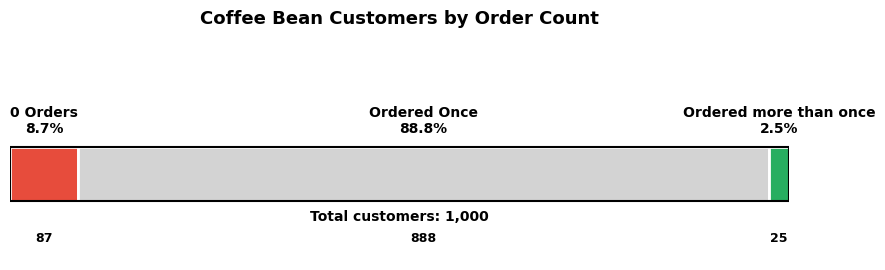

In [55]:

# Make sure the column exists and is ordered
customer_view['order_segment'] = pd.Categorical(
    pd.cut(
        customer_view['total_orders'],
        bins=[-1, 0, 1, customer_view['total_orders'].max()],
        labels=['0 Orders', 'Ordered Once', 'Ordered more than once']
    ),
    categories=['0 Orders', 'Ordered Once', 'Ordered more than once'],
    ordered=True
)

# Counts + percentages
order_counts = (
    customer_view['order_segment']
    .value_counts(normalize=False)
    .reindex(['0 Orders', 'Ordered Once', 'Ordered more than once'])
    .fillna(0)
)
order_perc = order_counts / order_counts.sum()

total_customers = int(order_counts.sum())

# Plot
colors = ['#e74c3c', '#D3D3D3', '#27ae60']  # coral, blue, green
fig, ax = plt.subplots(figsize=(9, 2.8))
left = 0

# Draw stacked sections
for i, (label, count) in enumerate(order_counts.items()):
    value = count / total_customers
    ax.barh(
        y=0, width=value, left=left, color=colors[i],
        edgecolor='white', height=0.5, linewidth=2
    )
    # Label above each segment
    ax.text(
        x=left + value/2, y=0.35,
        s=f"{label}\n{value*100:.1f}%",
        ha='center', va='bottom', color='black',
        fontsize=10, fontweight='bold'
    )
    left += value

# Perimeter border
ax.barh(y=0, width=1, left=0, color='none', edgecolor='black', linewidth=1.5, height=0.5)

#  Add total info under bar 
y_offset = -0.4
ax.text(0.5, y_offset, f"Total customers: {total_customers:,}", 
        ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Individual counts under each section
left = 0
for i, (label, count) in enumerate(order_counts.items()):
    value = count / total_customers
    ax.text(
        x=left + value/2, y=y_offset - 0.2,
        s=f"{count:,}", ha='center', va='center',
        fontsize=9,fontweight='bold', color='black'
    )
    left += value

# Style 
ax.set_xlim(0, 1)
ax.set_ylim(-0.8, 1.0)
ax.set_xticks([]); ax.set_yticks([])
ax.spines[['top','bottom','left','right']].set_visible(False)
ax.set_title('Coffee Bean Customers by Order Count', fontsize=13, fontweight='bold', pad=30)
plt.box(False)
plt.tight_layout()
plt.show()


# Sumary multiple orers by segment

In [57]:

# Define order and enforce it as categorical
seg_order = ['VIP', 'Top', 'Mid-High']

cv = customer_view.copy()
cv['spend_segment'] = pd.Categorical(cv['spend_segment'], categories=seg_order, ordered=True)

# --- Ensure numeric types ---
num_cols = ['total_orders','total_quantity','tot_sales','activity_days','activity_months']
cv[num_cols] = cv[num_cols].apply(pd.to_numeric, errors='coerce')

# --- Derived per-customer metrics ---
cv['avg_order_qty']          = np.where(cv['total_orders']>0, cv['total_quantity']/cv['total_orders'], np.nan)
cv['avg_order_spend']        = np.where(cv['total_orders']>0, cv['tot_sales']/cv['total_orders'], np.nan)
cv['avg_item_qty']           = cv['total_quantity']                 # total items per customer
cv['avg_spend_per_customer'] = cv['tot_sales']                      # total spend per customer

# --- Filter total_orders 1–6 (optional) ---
cv = cv[cv['total_orders'].between(1, 6)]

# --- Aggregate (now with customers + total_spend) ---
agg_tbl = (
    cv.groupby(['spend_segment','total_orders'])
      .agg(
          customers=('Customer ID','nunique'),          # NEW
          total_spend=('tot_sales','sum'),              # NEW £
          avg_order_qty=('avg_order_qty','mean'),
          avg_item_qty=('avg_item_qty','mean'),
          avg_order_spend=('avg_order_spend','mean'),
          avg_spend_per_customer=('avg_spend_per_customer','mean'),
          activity_days=('activity_days','mean'),
          activity_months=('activity_months','mean')
      )
      .round({
          'customers': 0,
          'total_spend': 2,
          'avg_order_qty': 2,
          'avg_item_qty': 2,
          'avg_order_spend': 2,
          'avg_spend_per_customer': 2,
          'activity_days': 1,
          'activity_months': 2
      })
      .sort_index(level=['spend_segment','total_orders'])
)

# --- Styled view (add bars + currency formatting for totals) ---
styled = (
    agg_tbl.style
    .bar(subset=['total_spend','avg_order_spend','avg_spend_per_customer'],
         color='#c39bd355', align='left')
    .set_properties(**{'text-align':'left','padding':'6px 10px'})
    .set_table_styles([{'selector':'th','props':[('text-align','left')]}])
    .format({
        'customers': '{:,.0f}',
        'total_spend': '£{:,.0f}',
        'avg_order_qty': '{:,.2f}',
        'avg_item_qty': '{:,.2f}',
        'avg_order_spend': '£{:,.2f}',
        'avg_spend_per_customer': '£{:,.2f}',
        'activity_days': '{:,.0f}',
        'activity_months': '{:,.2f}',
    })
)
styled


In [58]:

# # Columns that must be numeric
# num_cols = ['avg_price', 'activity_days', 'tot_sales', 'total_profit']

# # Clean in place on customer_view
# for c in num_cols:
#     if c in customer_view.columns:
#         # strip currency symbols, commas, spaces, and text like " days"
#         customer_view[c] = (
#             customer_view[c]
#             .astype(str)
#             .str.replace(r'[^\d\.\-]', '', regex=True)   # keep digits . -
#             .replace({'': None})
#         )
#         customer_view[c] = pd.to_numeric(customer_view[c], errors='coerce').astype(float)

# # (optional) sanity check
# print(customer_view[num_cols].dtypes)


In [59]:

SEG = 'order_segment'
sales_col  = 'tot_sales'
profit_col = 'total_profit'

df = customer_view.assign(activity_days=customer_view['activity_days'].astype(float))

pv = (
    df.groupby(SEG).agg(
        total_customers=('Customer ID', 'nunique'),
        total_orders=('total_orders', 'sum'),
        total_quantity=('total_quantity', 'sum'),
        avg_total_quantity=('total_quantity', 'mean'),   # 👈 average total quantity
        avg_price=('avg_price', 'mean'),
        activity_days_min=('activity_days', 'min'),
        activity_days_max=('activity_days', 'max'),
        activity_days_mean=('activity_days', 'mean'),
        total_sales=(sales_col, 'sum'),
        total_profit=(profit_col, 'sum')
    )
    .sort_index()
)

# Derived metrics
pv['avg_spend_per_customer'] = pv['total_sales'] / pv['total_customers']
pv['avg_spend_per_order']    = pv['total_sales'] / pv['total_orders']
pv['avg_quantity_per_order'] = pv['total_quantity'] / pv['total_orders']   # 👈 new metric

# Optional tidy column order
pv = pv[
    [
        'total_customers',
        'total_orders',
        'total_quantity',
        'avg_total_quantity',
        'avg_quantity_per_order',      # 👈 new column
        'avg_price',
        'avg_spend_per_customer',
        'avg_spend_per_order',
        'activity_days_min',
        'activity_days_max',
        'activity_days_mean',
        'total_sales',
        'total_profit'
    ]
]

pv




,total_customers,total_orders,total_quantity,avg_total_quantity,avg_quantity_per_order,avg_price,avg_spend_per_customer,avg_spend_per_order,activity_days_min,activity_days_max,activity_days_mean,total_sales,total_profit
order_segment,,,,,,,,,,,,,
0 Orders,87,0,0.0,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000,0.00000
Ordered Once,888,888,3285.0,3.699324,3.699324,1.435937,46.805456,46.805456,1.0,1.0,1.00,41563.245,1202.03970
Ordered more than once,25,69,266.0,10.640000,3.855072,1.424744,142.840400,51.753768,1.0,1140.0,547.72,3571.010,99.33535


# Remove cusotmers with 0 sales

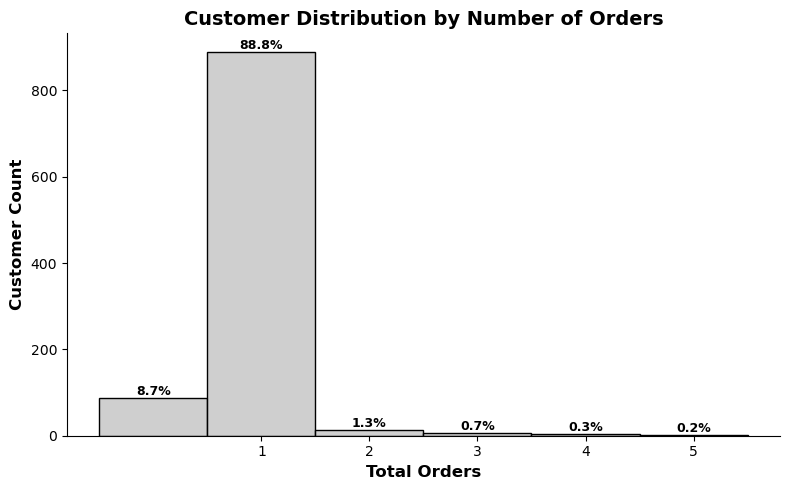

In [61]:


max_orders = int(customer_view['total_orders'].max())
bins = np.arange(0, max_orders + 2) - 0.5   # center bars on integers

fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(
    data=customer_view,
    x='total_orders',
    bins=bins,
    kde=False,
    color='silver',
    ax=ax
)

# Add % labels above bars
total = len(customer_view)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom',
                fontsize=9, color='black', fontweight='bold')

# Titles & labels
ax.set_title('Customer Distribution by Number of Orders', fontsize=14, fontweight='bold')
ax.set_xlabel('Total Orders', fontsize=12, fontweight='bold')
ax.set_ylabel('Customer Count', fontsize=12, fontweight='bold')

# X ticks (limit to 20 if too many)
ax.set_xticks(range(1, min(max_orders, 20) + 1))

# Remove grid lines completely
ax.grid(False)

# Optional: clean up borders
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


In [62]:
#customer_view = customer_view[customer_view['total_orders'] > 0]

## ad segments to the 'merged' dataset by order

In [64]:
# Columns to add from customer_view
add_columns = ['Customer ID', 'spend_segment', 'order_segment']

# Merge back into merged
merged = merged.merge(
    customer_view[add_columns],
    on='Customer ID',
    how='left'
)

# Descriptive Statistic on Numerical, Histograms and Boxplots

##  Descriptive stat

In [67]:
num_cols = ['total_orders', 'total_quantity', 'tot_sales', 'activity_days', 'activity_months', 'frequency_rate_days', 'recency', 'avg_items_order', 'avg_spend_order', 'frequency_score','recency_score','avg_price']
num_cols_forced = list(set(num_cols) - set(['frequency_score','recency_score']))
desc = customer_view[num_cols_forced].describe().T

In [68]:

desc['skew'] = customer_view[num_cols_forced].skew()
desc['kurtosis'] = customer_view[num_cols_forced].kurtosis()
desc.round(2)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
tot_sales,1000.0,45.13,48.25,0.00,12.81,28.55,59.71,317.07,1.96,4.72
recency,913.0,645.48,378.25,0.00,316.00,621.00,965.00,1325.00,0.11,-1.18
activity_days,913.0,15.97,109.05,1.00,1.00,1.00,1.00,1140.00,7.94,65.02
total_quantity,1000.0,3.55,2.55,0.00,2.00,3.00,5.00,22.00,1.87,8.40
avg_spend_order,913.0,46.95,43.47,2.68,16.50,31.62,63.25,281.68,1.69,3.01
avg_items_order,913.0,3.70,1.97,1.00,2.00,4.00,5.00,18.00,1.38,7.01
total_orders,1000.0,0.96,0.43,0.00,1.00,1.00,1.00,5.00,2.70,26.36
frequency_rate_days,913.0,0.98,0.16,0.00,1.00,1.00,1.00,2.00,-5.30,32.63
activity_months,913.0,0.49,3.59,0.00,0.00,0.00,0.00,37.50,7.94,64.98
avg_price,1000.0,1.31,0.53,0.00,1.12,1.34,1.58,2.38,-0.82,1.17


In [69]:

def plot_num_distribution(df, cols, bins=30):
    """
    Plots histogram + boxplot side by side for each numeric column in 'cols'.
    """
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(f'{col}', fontsize=14, fontweight='bold')

        # Histogram
        sns.histplot(df[col].dropna(), bins=bins, kde=False, ax=axes[0], color='skyblue')
        axes[0].set_title('Distribution')
        axes[0].set_xlabel('')
        axes[0].set_ylabel('Count')

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1], color='lightcoral')
        axes[1].set_title('Boxplot')
        axes[1].set_xlabel('')

        plt.tight_layout()
        plt.show()


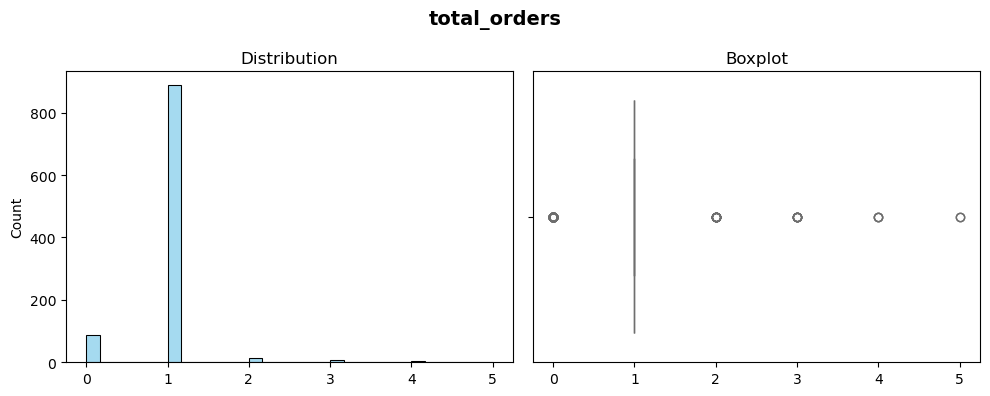

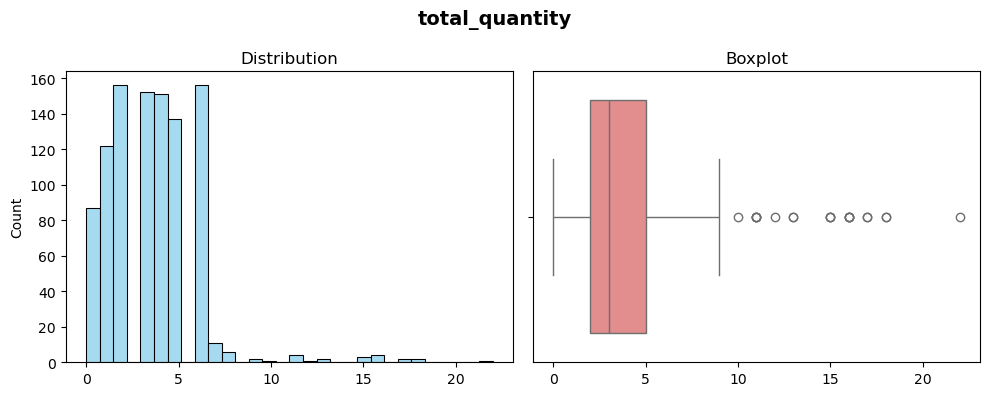

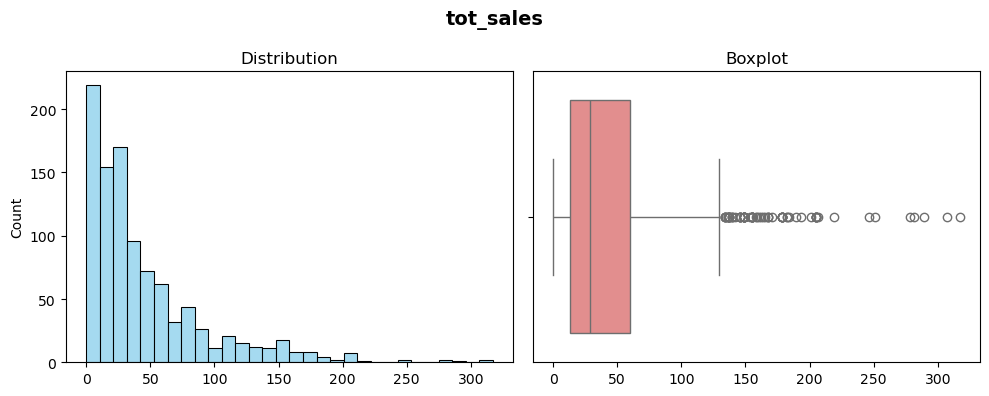

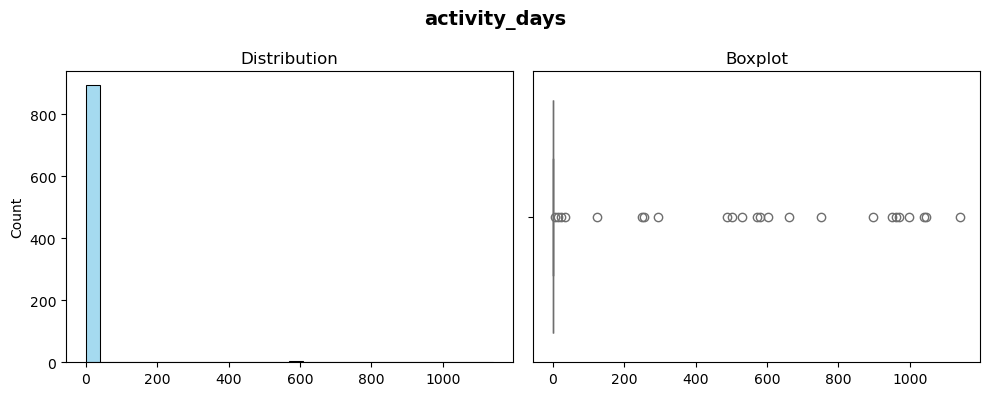

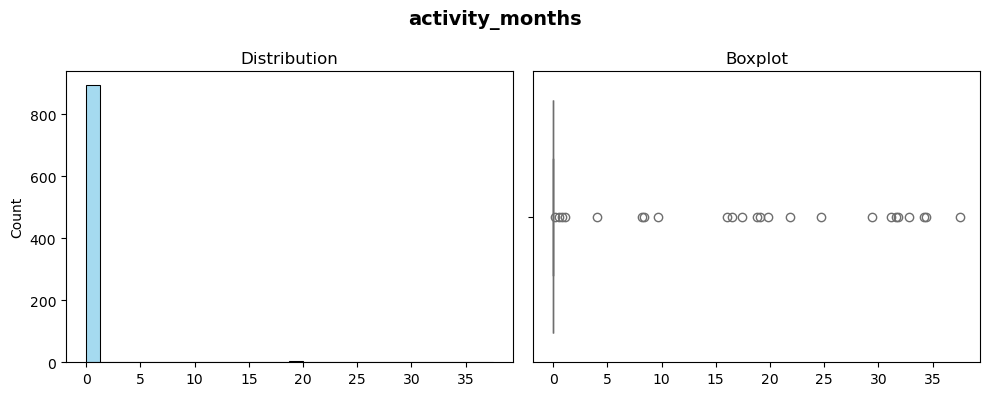

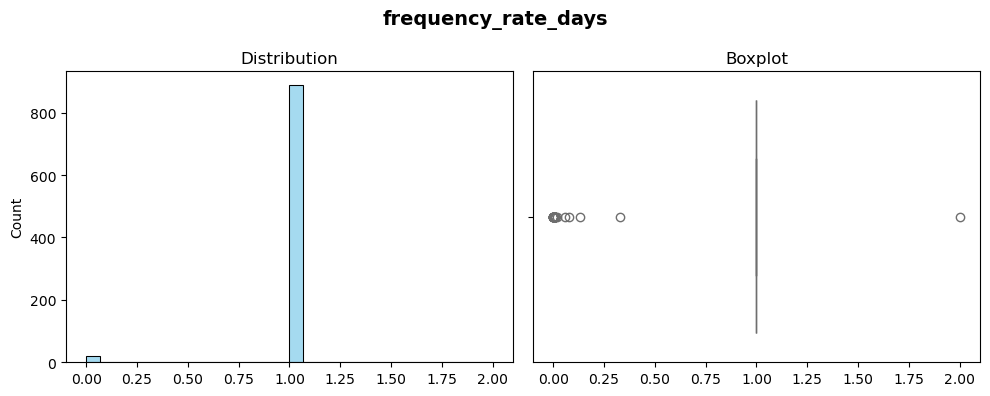

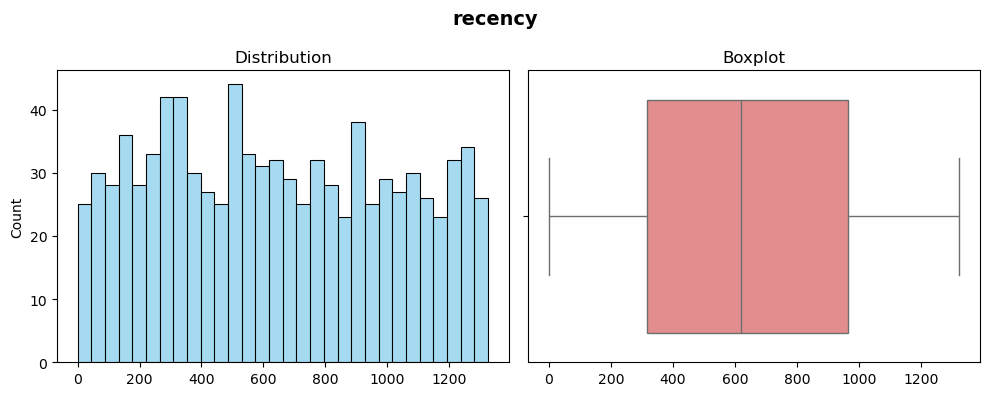

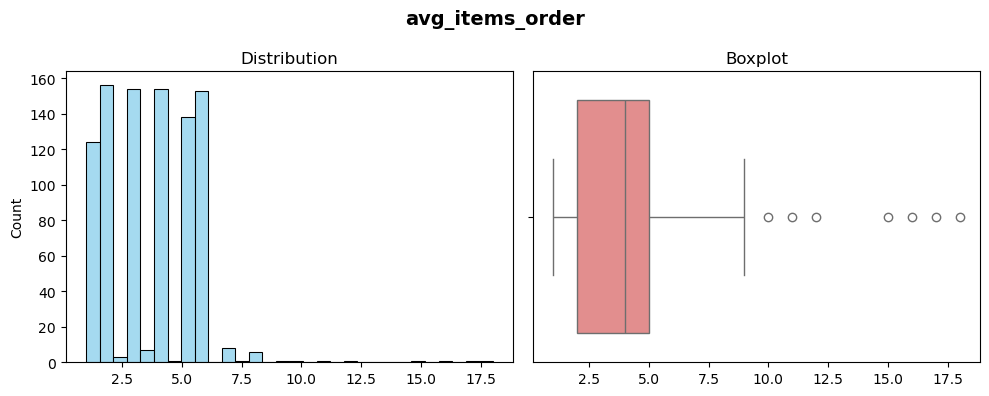

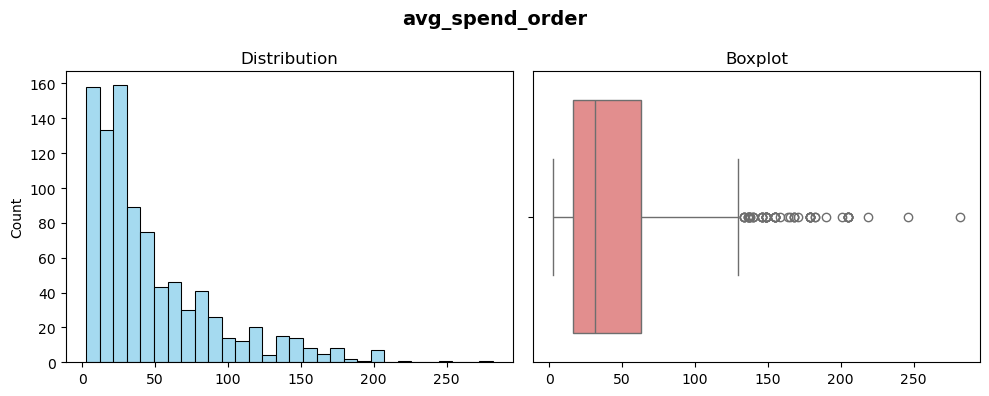

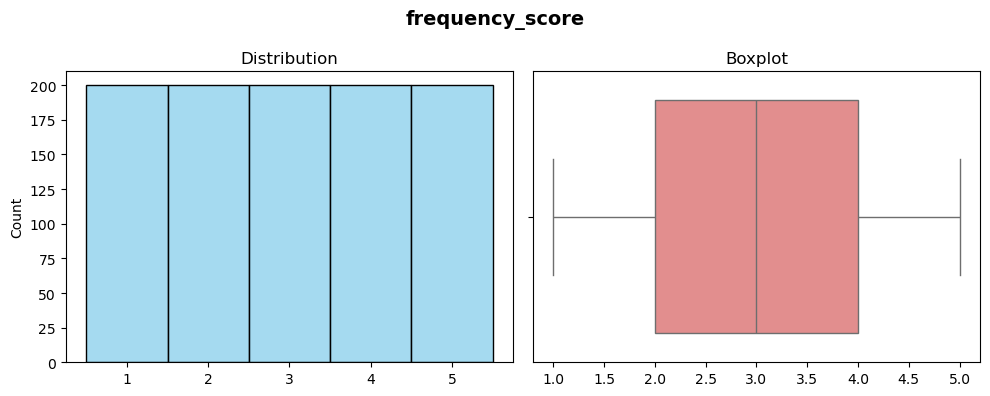

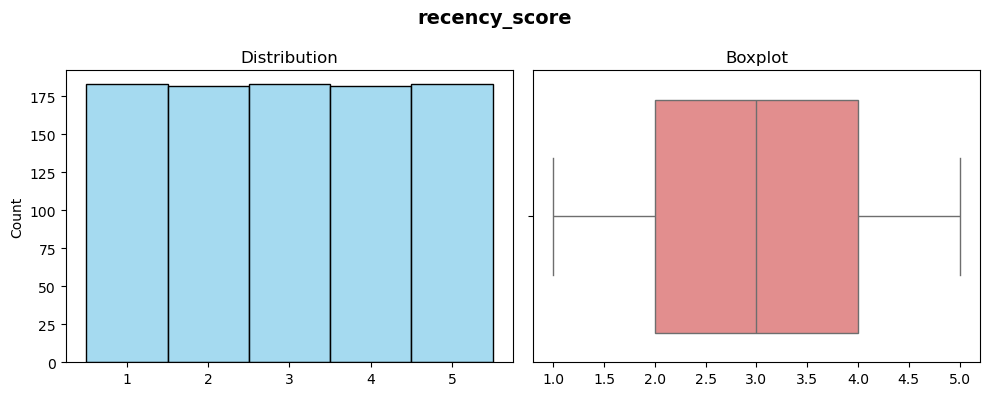

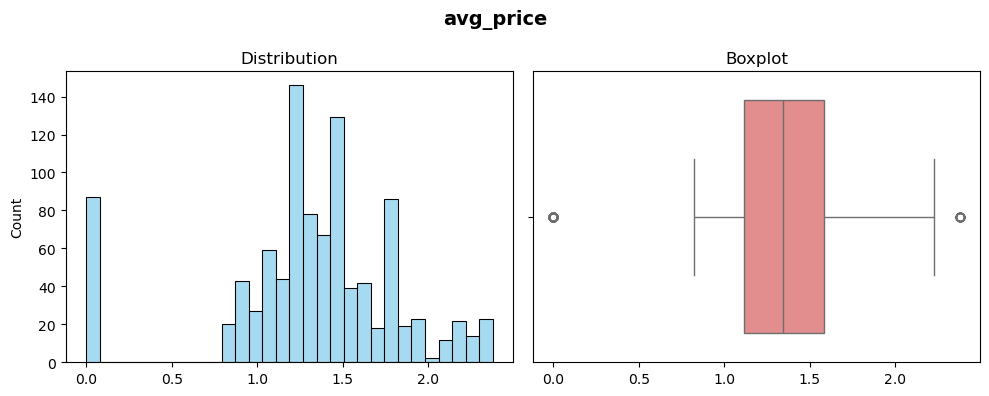

In [70]:

plot_num_distribution(customer_view, num_cols)

## Variables Correlation Matrix

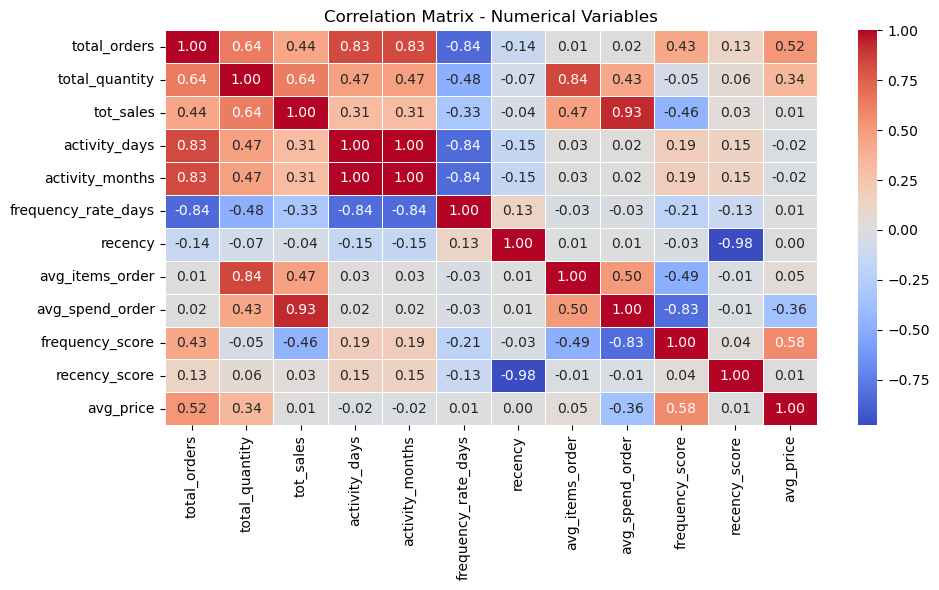

In [72]:
corr = customer_view[num_cols].corr()
corr.round(2)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix - Numerical Variables")
plt.tight_layout()
plt.show()


## Pairplot

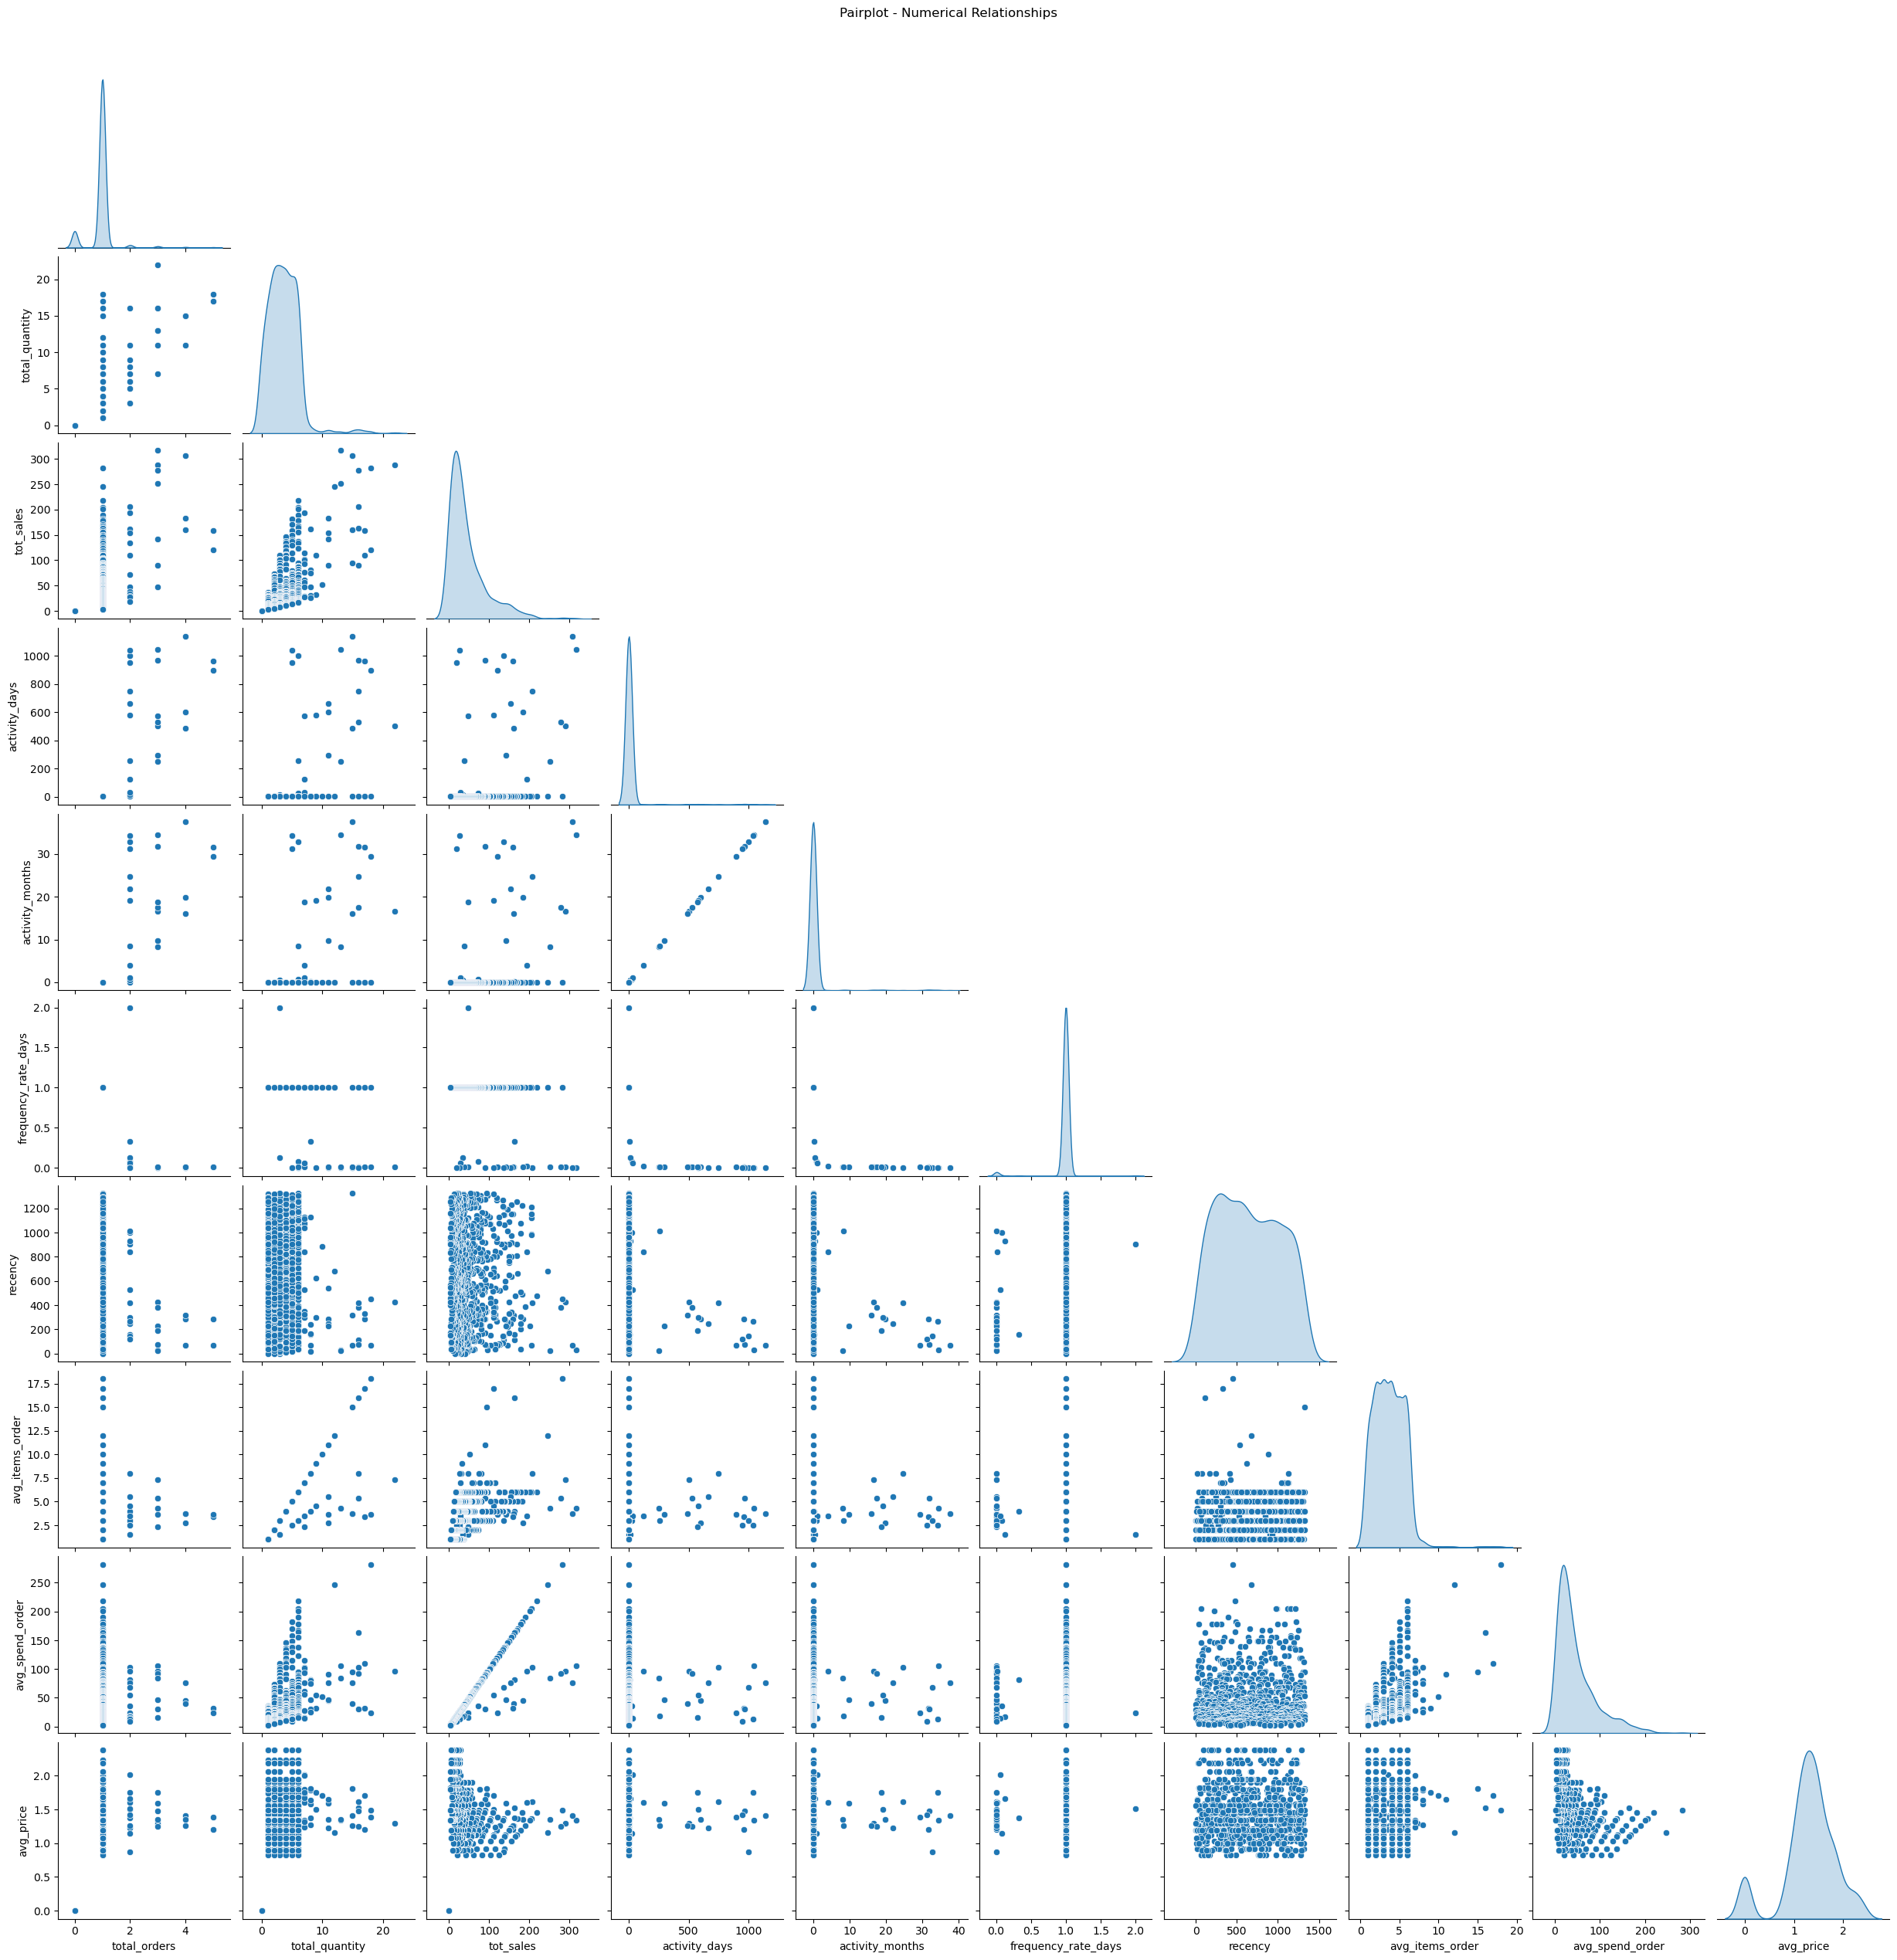

In [74]:


sns.pairplot(customer_view[num_cols], corner=True, diag_kind='kde')
plt.suptitle("Pairplot - Numerical Relationships", y=1.02)
plt.show()


# Explore Categorical

In [76]:
customer_view.nunique()

Customer ID              1000
Customer Name            1000
Loyalty Card                2
Country                     3
City                      386
Postcode                  629
Address Line 1           1000
total_orders                6
first_order               669
last_order                667
total_productst             7
total_quantity             19
total_profit              101
tot_sales                 248
avg_price                  92
coffee_types                5
roast_types                 4
coffee_size                 4
has_email                   2
has_phone                   2
activity_days              25
activity_months            25
activity_weeks             25
first_order_year            4
last_order_year             4
frequency_rate_days         9
frequency_rate_months      19
frequency                   6
recency                   667
lifetime                  669
avg_spend_order           247
avg_items_order            30
recency_score               5
frequency_

## Barplots: count, total sales, avg sales x customer

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

def categorical_summary(df, cat_col, value_col='tot_sales'):
    # Aggregate metrics
    summary = (
        df.groupby(cat_col)[value_col]
        .agg(total_sales='sum', avg_sales='mean', count='count')
        .reset_index()
    )

    # Percent of total
    summary['count_pct'] = 100 * summary['count'] / summary['count'].sum()
    summary['sales_pct'] = 100 * summary['total_sales'] / summary['total_sales'].sum()

    # Plot layout
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(f'{cat_col}:', fontsize=14)

    # --- Count (%)
    ax = sns.barplot(data=summary, x=cat_col, y='count_pct', ax=axes[0])
    axes[0].set_title('Customer Count (%)')
    axes[0].set_ylabel('% of Total')
    axes[0].set_xlabel('')
    axes[0].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        height = p.get_height()
        axes[0].text(p.get_x() + p.get_width()/2., height + 0.3,
                     f'{height:.1f}%', ha="center")

    # --- Total sales (%)
    ax = sns.barplot(data=summary, x=cat_col, y='sales_pct', ax=axes[1])
    axes[1].set_title('Total Sales (%)')
    axes[1].set_ylabel('% of Total')
    axes[1].set_xlabel('')
    axes[1].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        height = p.get_height()
        axes[1].text(p.get_x() + p.get_width()/2., height + 0.3,
                     f'{height:.1f}%', ha="center")

    # --- Average sales (£)
    ax = sns.barplot(data=summary, x=cat_col, y='avg_sales', ax=axes[2])
    axes[2].set_title('Average Sales per Customer (£)')
    axes[2].set_ylabel('£')
    axes[2].set_xlabel('')
    axes[2].tick_params(axis='x', rotation=45)

    for p in ax.patches:
        height = p.get_height()
        axes[2].text(p.get_x() + p.get_width()/2., height + (height * 0.01),
                     f'£{height:.0f}', ha="center")

    plt.tight_layout()
    plt.show()

    return summary




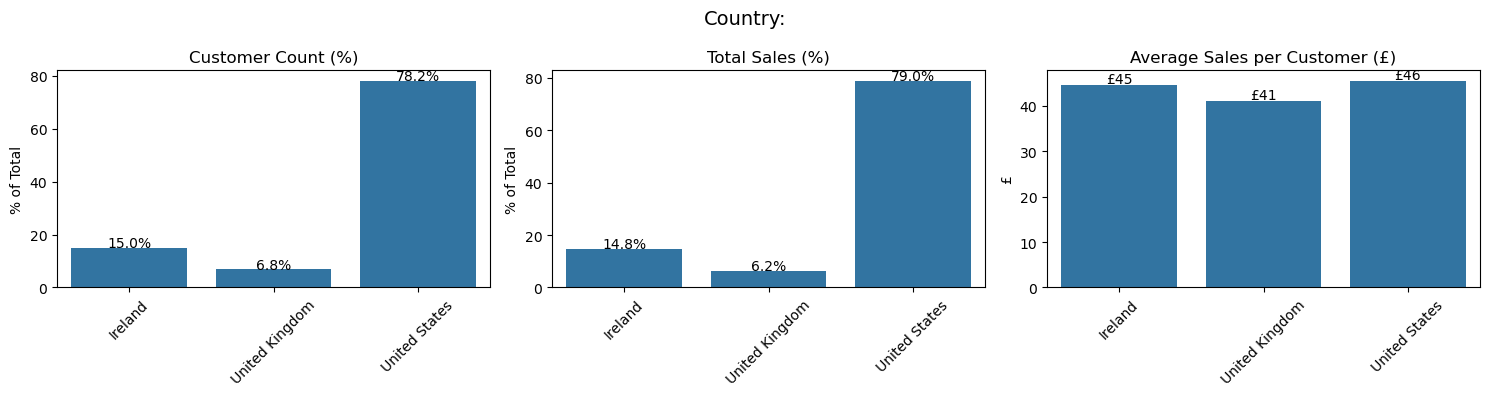

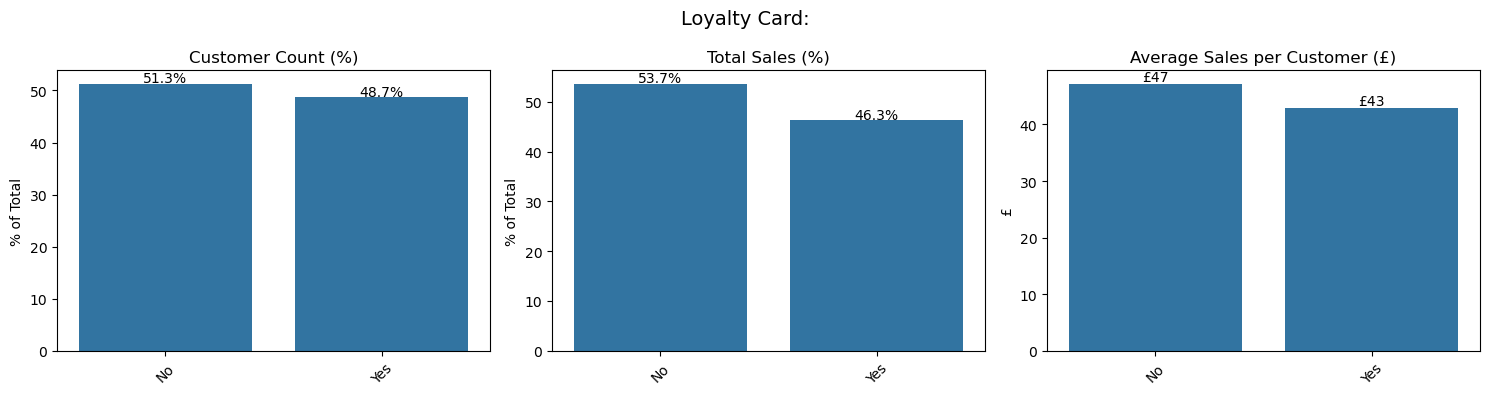

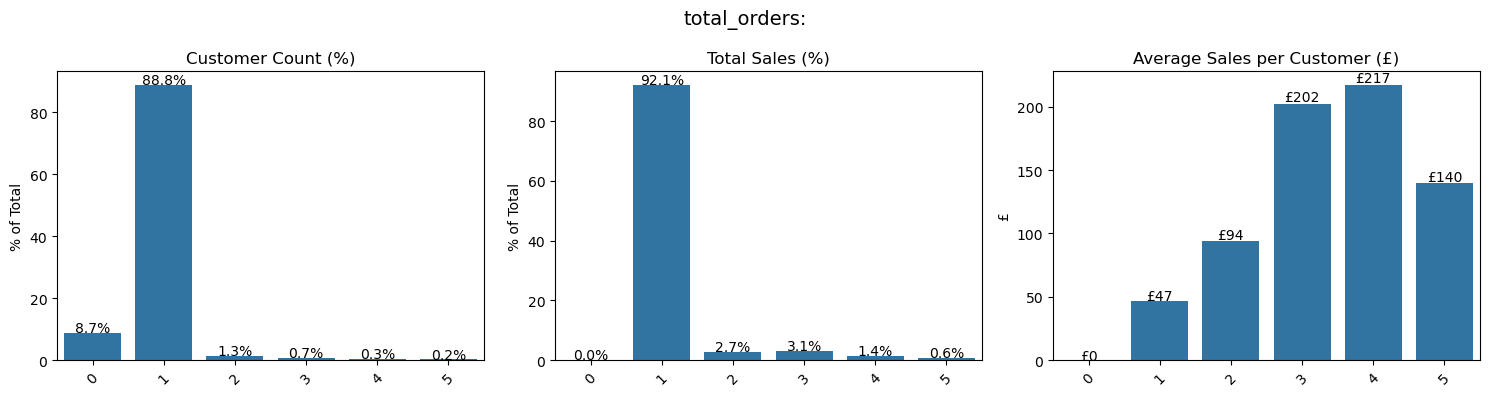

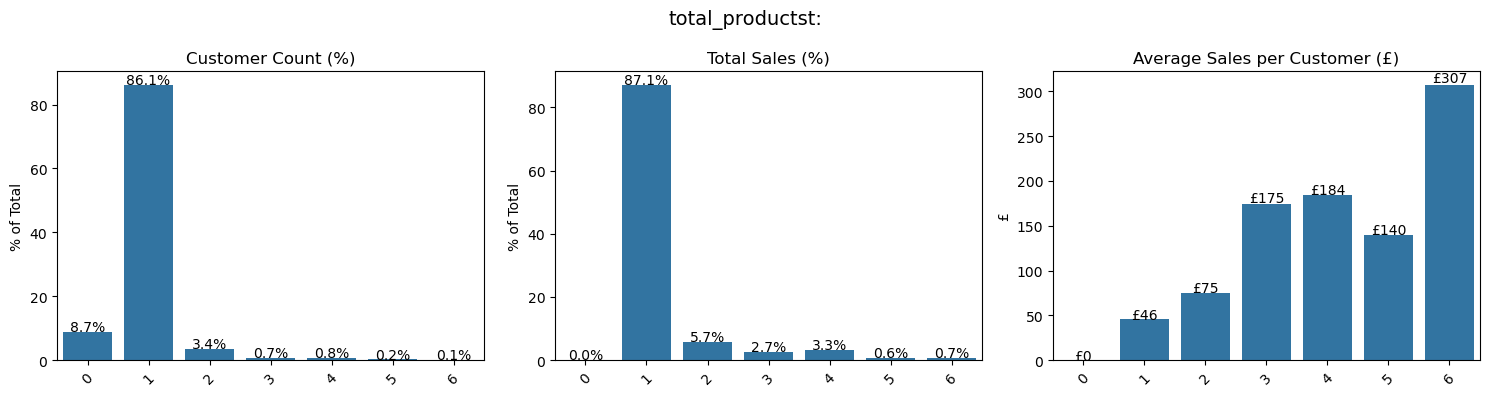

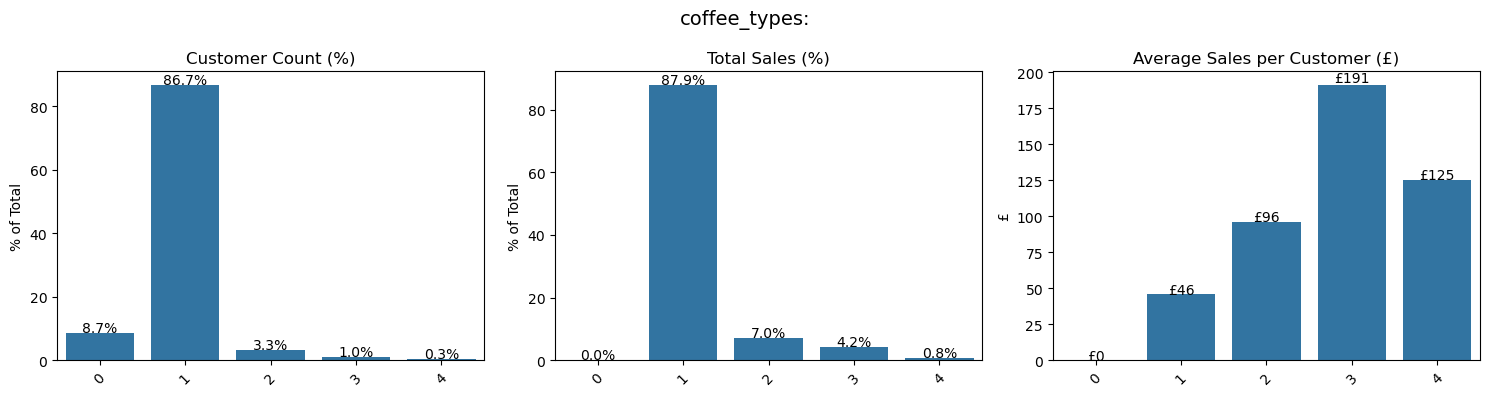

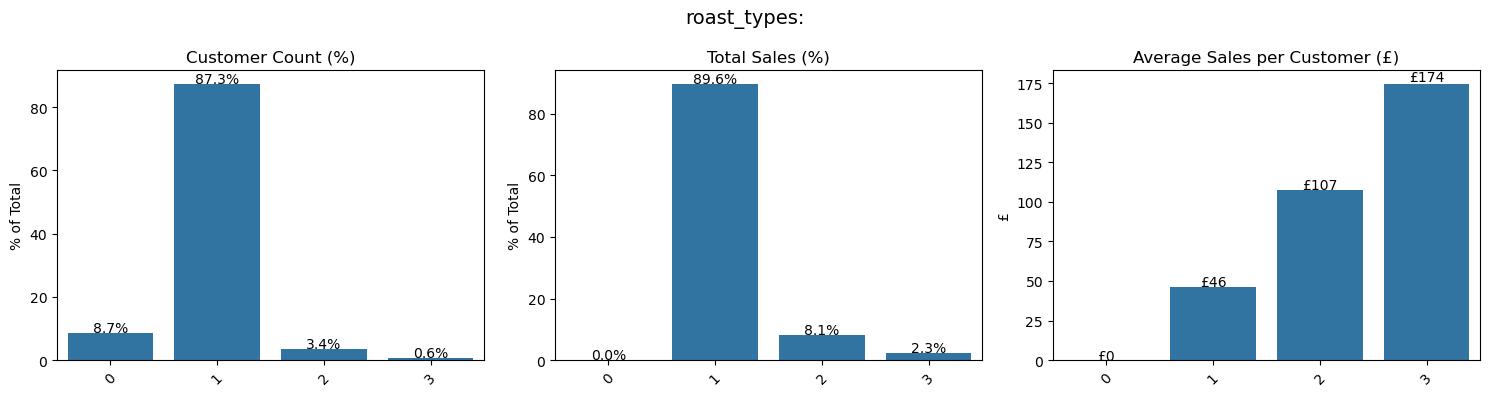

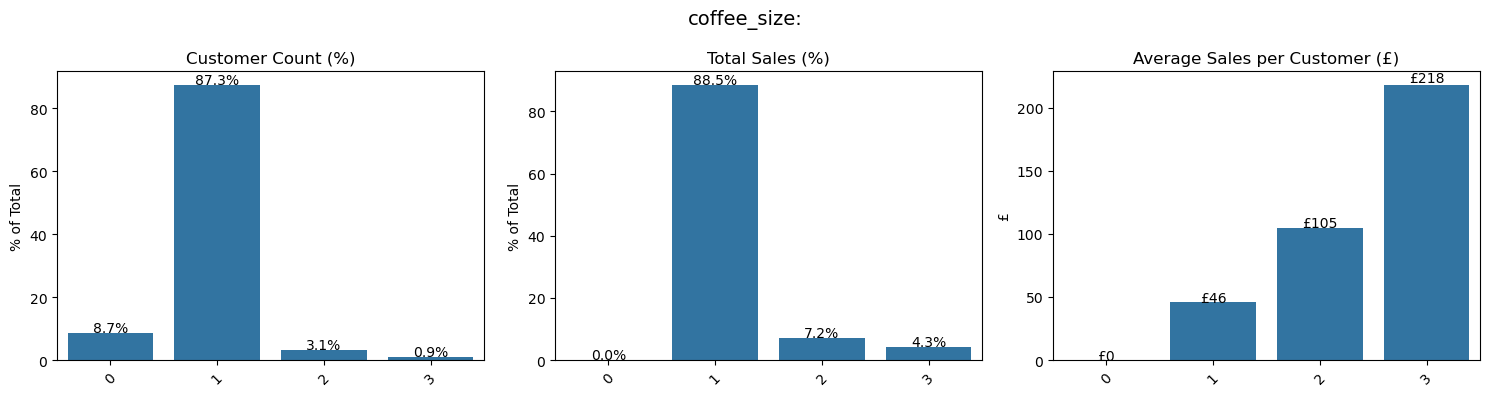

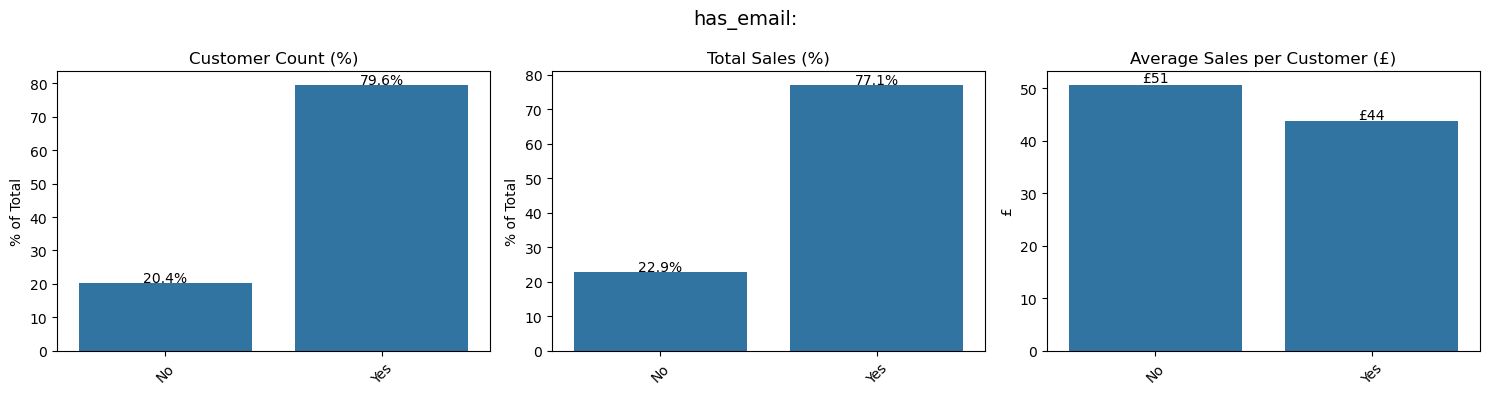

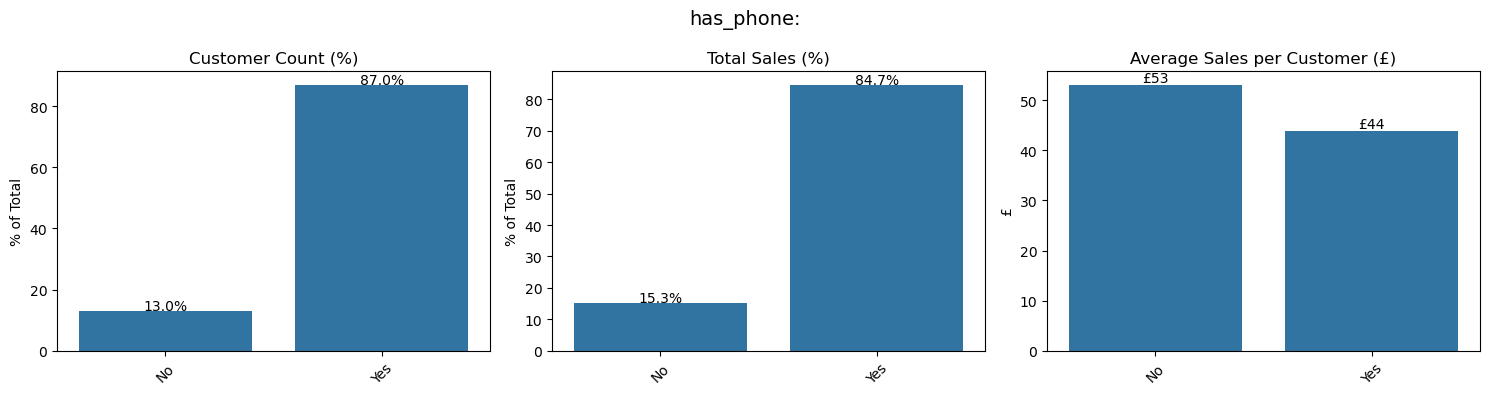

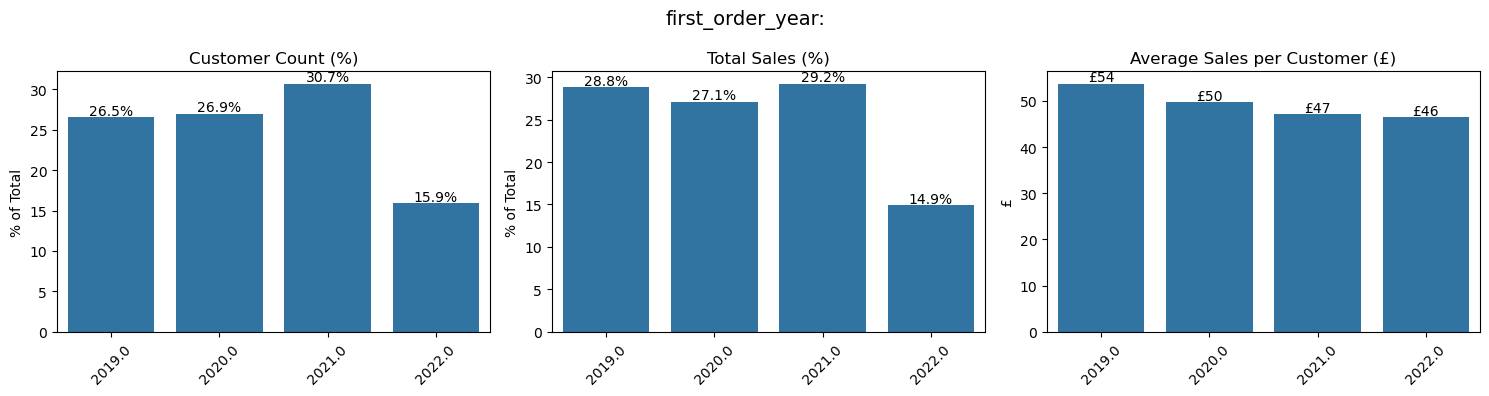

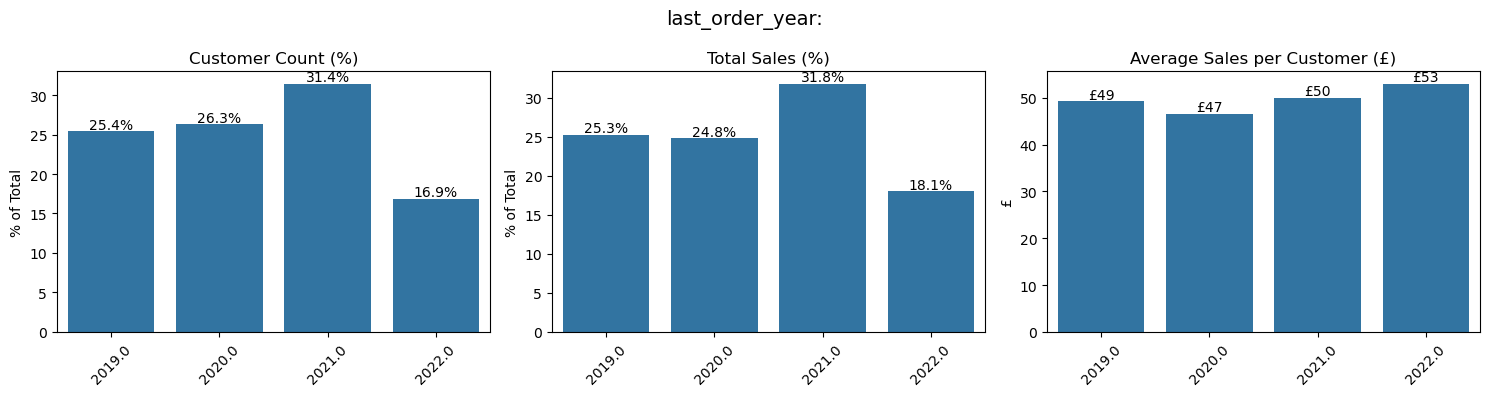

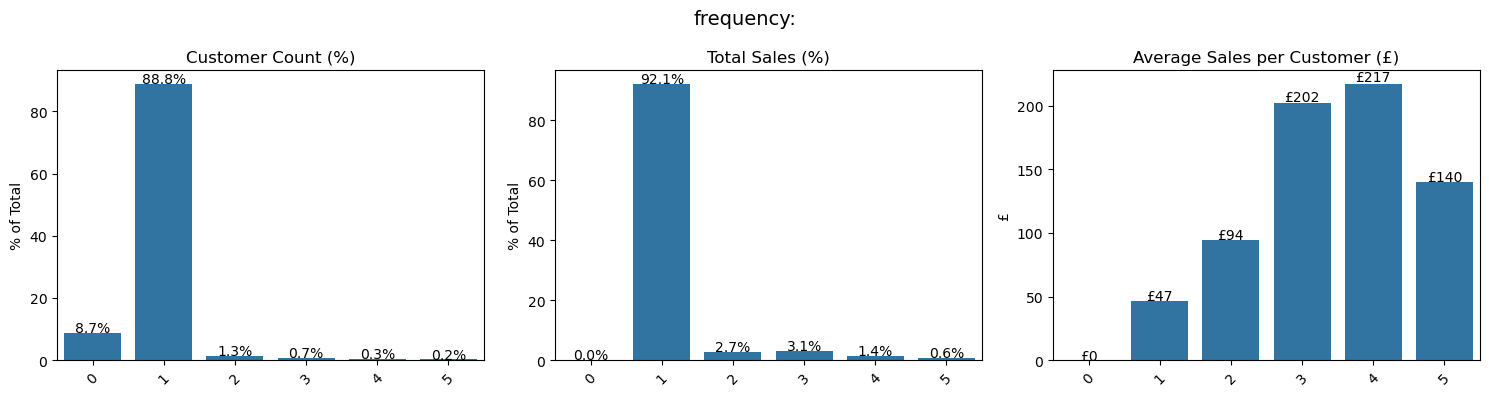

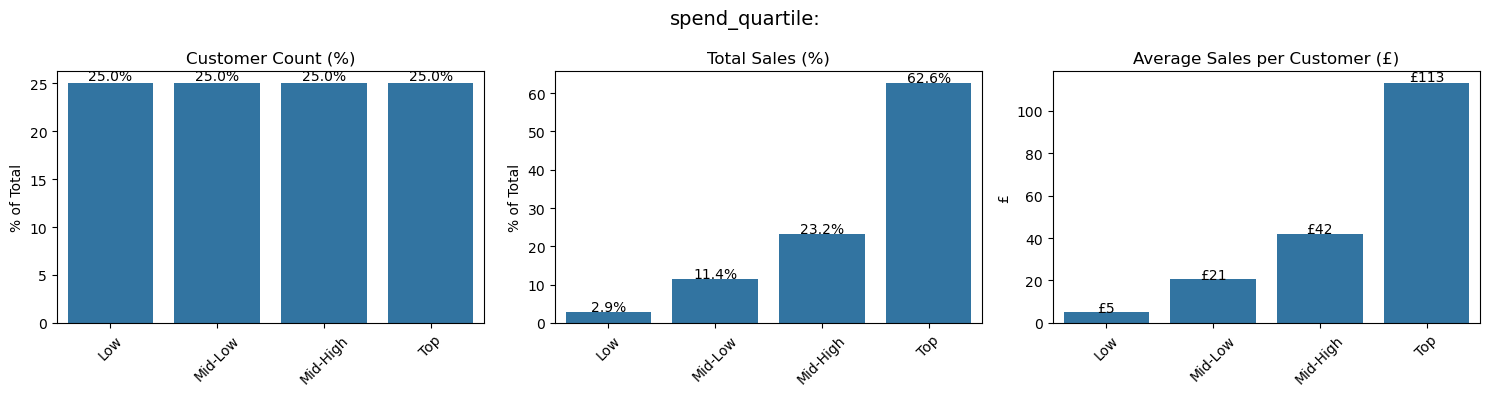

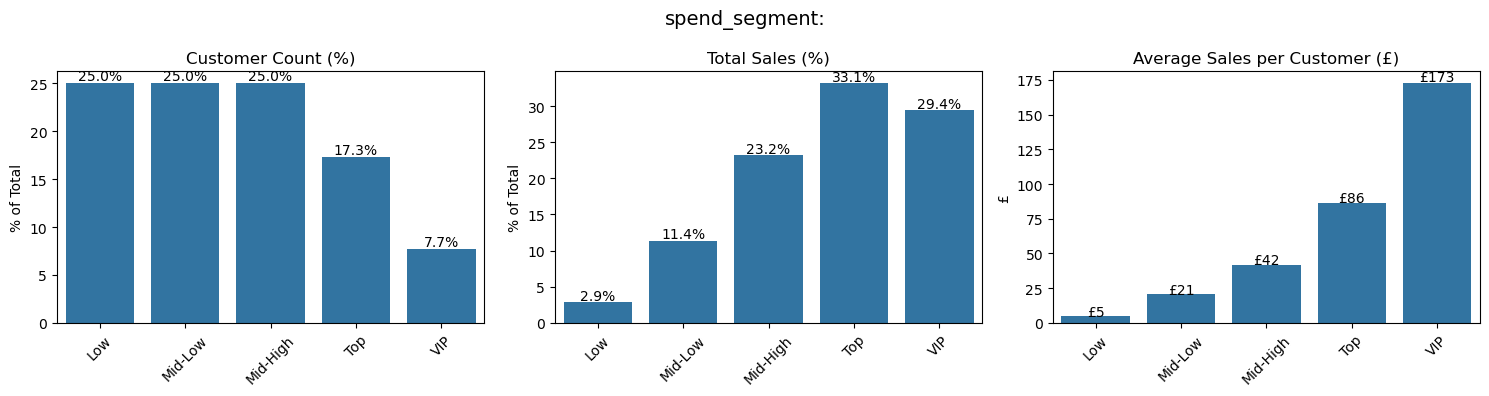

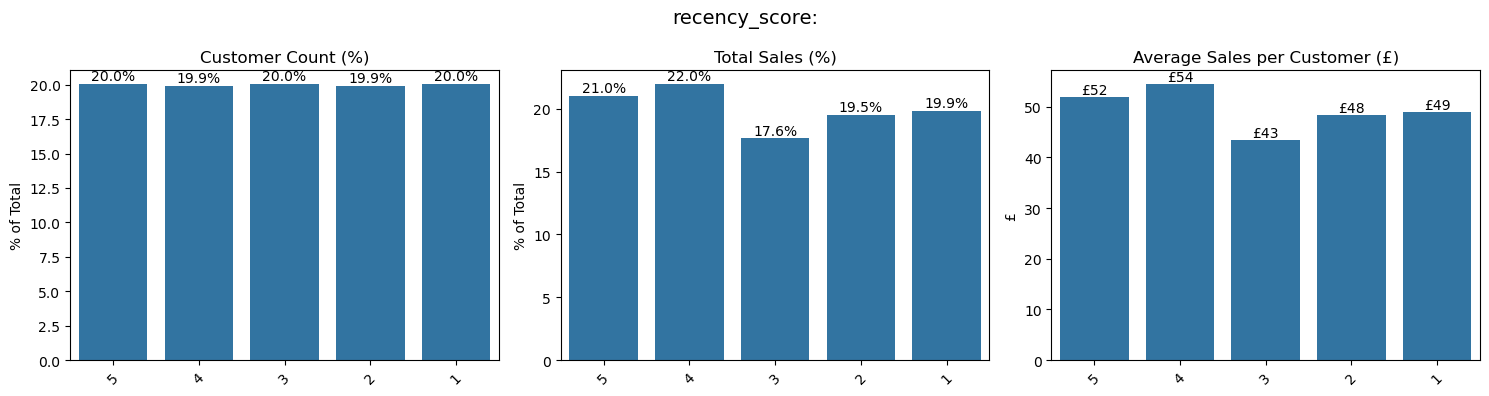

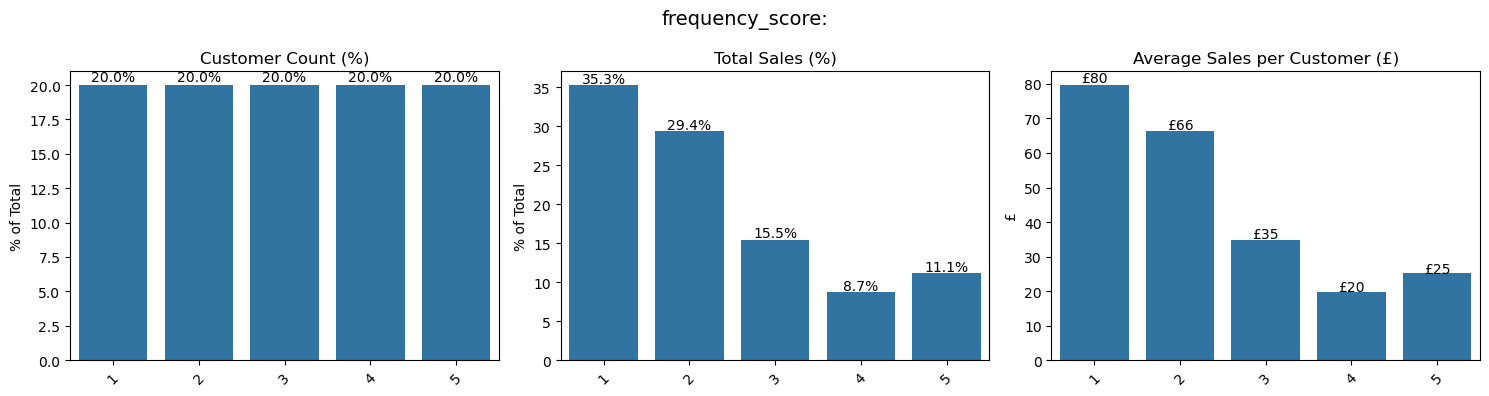

In [79]:
cat_cols = [
    'Country',
    'Loyalty Card',
    'total_orders',
    'total_productst',
    'coffee_types',
    'roast_types',
    'coffee_size',
    'has_email',
    'has_phone',
    'first_order_year',
    'last_order_year',
    'frequency',
    'spend_quartile',
    'spend_segment',
    'recency_score',
    'frequency_score',
]




for col in cat_cols:
    categorical_summary(customer_view, col)


# Seasonality

In [81]:
print(merged.columns)
print(customer_view.columns)

Index(['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity',
       'Coffee Type', 'Roast Type', 'Size', 'Unit Price', 'Price per 100g',
       'Profit', 'Customer Name', 'Email', 'Phone Number', 'Address Line 1',
       'City', 'Country', 'Postcode', 'Loyalty Card', 'tot_sales',
       'spend_segment', 'order_segment'],
      dtype='object')
Index(['Customer ID', 'Customer Name', 'Loyalty Card', 'Country', 'City',
       'Postcode', 'Address Line 1', 'total_orders', 'first_order',
       'last_order', 'total_productst', 'total_quantity', 'total_profit',
       'tot_sales', 'avg_price', 'coffee_types', 'roast_types', 'coffee_size',
       'has_email', 'has_phone', 'activity_days', 'activity_months',
       'activity_weeks', 'first_order_year', 'last_order_year',
       'frequency_rate_days', 'frequency_rate_months', 'frequency', 'recency',
       'lifetime', 'avg_spend_order', 'avg_items_order', 'recency_score',
       'frequency_score', 'spend_quartile', 'spend_segment', 

In [82]:
min_date = merged['Order Date'].min()
max_date = merged['Order Date'].max()

print(min_date)
print(max_date)

2019-01-02 00:00:00
2022-08-19 00:00:00


In [83]:
# Ensure the column is datetime
merged['Order Date'] = pd.to_datetime(merged['Order Date'], errors='coerce')

# Create separate year and month columns
merged['order_year'] = merged['Order Date'].dt.year
merged['order_month'] = merged['Order Date'].dt.month
merged['order_month_name'] = merged['Order Date'].dt.strftime('%b')

In [84]:
import pandas as pd

sales_by_year = (
    merged
    .groupby(['order_year', 'spend_segment'], as_index=False)['tot_sales']
    .sum()
    .rename(columns={'tot_sales': 'total_sales'})
    .sort_values(['order_year', 'spend_segment'], ascending=True)
)

# ormat with comma separators
sales_by_year['total_sales'] = sales_by_year['total_sales'].apply(lambda x: f"{x:,.0f}")

sales_by_year


,order_year,spend_segment,total_sales
0,2019.0,Low,340
1,2019.0,Mid-Low,"1,402"
2,2019.0,Mid-High,"2,220"
3,2019.0,Top,"3,923"
4,2019.0,VIP,"4,301"
5,2020.0,Low,292
6,2020.0,Mid-Low,"1,491"
7,2020.0,Mid-High,"2,956"
8,2020.0,Top,"3,918"
9,2020.0,VIP,"3,462"


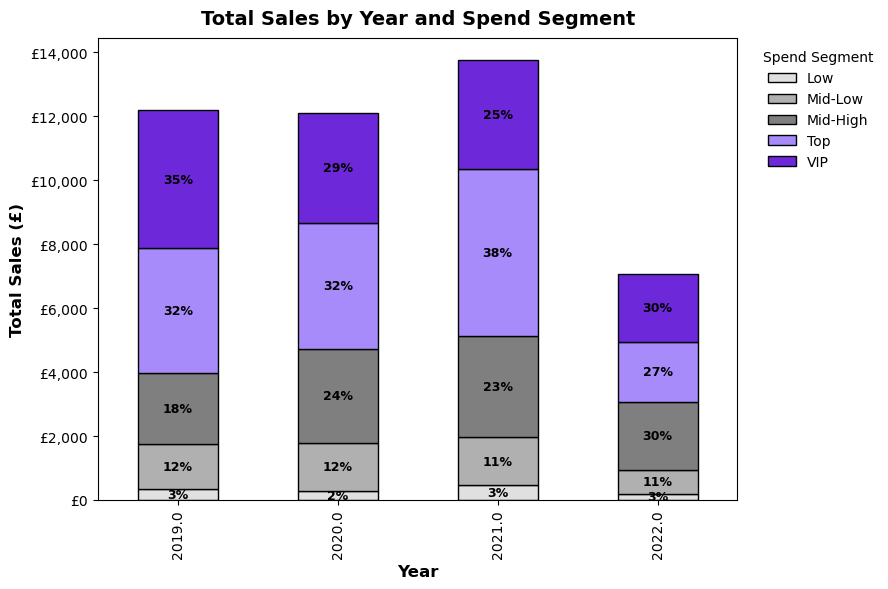

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Aggregate sales by year and segment ---
sales_by_year = (
    merged
    .groupby(['order_year', 'spend_segment'], as_index=False)['tot_sales']
    .sum()
    .rename(columns={'tot_sales': 'total_sales'})
    .sort_values(['order_year', 'spend_segment'], ascending=True)
)

# --- Pivot for stacking ---
pivot_df = sales_by_year.pivot(index='order_year', columns='spend_segment', values='total_sales').fillna(0)

# --- Ensure logical segment order ---
segment_order = ['Low', 'Mid-Low', 'Mid-High', 'Top', 'VIP']
pivot_df = pivot_df.reindex(columns=segment_order, fill_value=0)

# --- Colors ---
colors = {
    'Low':        '#E0E0E0',
    'Mid-Low':    '#B0B0B0',
    'Mid-High':   '#7F7F7F',
    'Top':        '#A78BFA',
    'VIP':        '#6D28D9',
}

# --- Plot ---
fig, ax = plt.subplots(figsize=(9,6))
bars = pivot_df.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[colors[c] for c in pivot_df.columns],
    edgecolor='black'
)

# --- Add percentage labels on each hue ---
for idx, year in enumerate(pivot_df.index):
    total = pivot_df.loc[year].sum()
    cumulative = 0
    for segment in pivot_df.columns:
        value = pivot_df.loc[year, segment]
        if value > 0:
            pct = 100 * value / total
            cumulative += value
            y_pos = cumulative - (value / 2)
            ax.text(
                idx, y_pos, f'{pct:.0f}%',
                ha='center', va='center',
                fontsize=9, color='black', fontweight='bold'
            )

# --- Formatting ---
ax.set_title('Total Sales by Year and Spend Segment', fontsize=14, fontweight='bold', pad=10)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Sales (£)', fontsize=12, fontweight='bold')
ax.grid(False)
ax.legend(title='Spend Segment', bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)

# Format y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.0f}'))

plt.tight_layout()
plt.show()


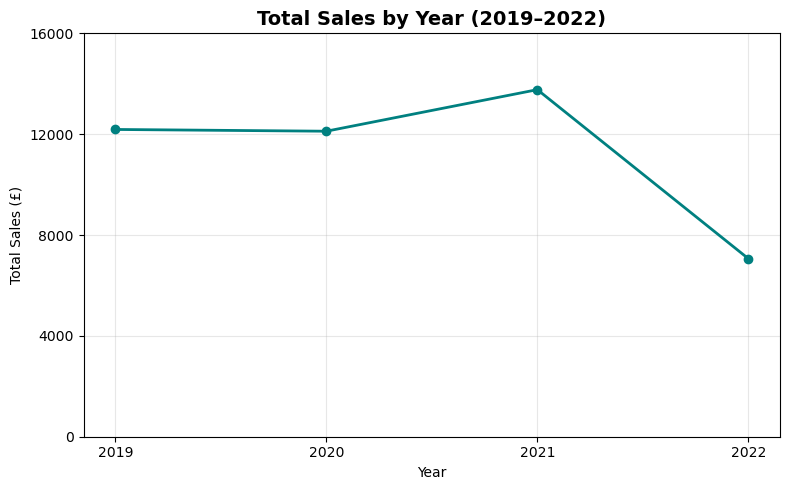

In [86]:


# Ensure date & numeric
merged['Order Date'] = pd.to_datetime(merged['Order Date'], errors='coerce')
merged['tot_sales'] = pd.to_numeric(merged['tot_sales'], errors='coerce')

# --- Filter date range: 2019–2022 ---
mask = (merged['Order Date'].dt.year >= 2019) & (merged['Order Date'].dt.year <= 2022)
filtered = merged[mask]

# --- Group total sales by year ---
yearly_sales = (
    filtered.groupby(filtered['Order Date'].dt.year)['tot_sales']
    .sum()
    .reset_index(name='total_sales')
)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(yearly_sales['Order Date'], yearly_sales['total_sales'], marker='o', color='teal', linewidth=2)

plt.title('Total Sales by Year (2019–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Sales (£)')
plt.grid(alpha=0.3)

# --- Adjust y-axis scale (tick every 1k) ---
ymax = yearly_sales['total_sales'].max()
plt.yticks(np.arange(0, ymax + 4000, 4000))  # step of £1,000

plt.xticks(yearly_sales['Order Date'])
plt.tight_layout()
plt.show()



In [87]:


# Group customers by loyalty and order segment
grouped = (
    customer_view
    .groupby(['Loyalty Card', 'order_segment'])['Customer ID']
    .nunique()
    .reset_index(name='customer_count')
)

# Pivot for stacked bar format
pivot_df = grouped.pivot(index='Loyalty Card', columns='order_segment', values='customer_count').fillna(0)

# Add a total column (optional)
pivot_df['Total'] = pivot_df.sum(axis=1)

pivot_df


order_segment,0 Orders,Ordered Once,Ordered more than once,Total
Loyalty Card,,,,
No,43,458,12,513
Yes,44,430,13,487


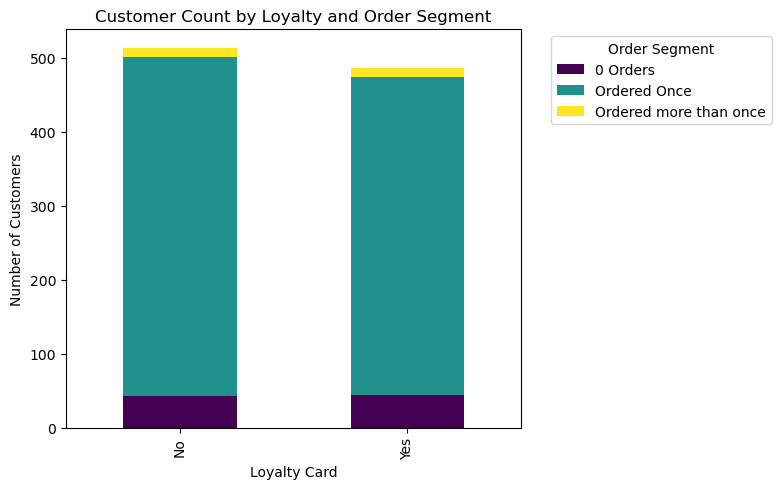

In [88]:
pivot_df.drop(columns='Total').plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    colormap='viridis'
)

plt.title('Customer Count by Loyalty and Order Segment')
plt.xlabel('Loyalty Card')
plt.ylabel('Number of Customers')
plt.legend(title='Order Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [89]:

# Group by first order year and spend segment
grouped = (
    customer_view
    .groupby(['first_order_year', 'spend_segment'])['Customer ID']
    .nunique()
    .reset_index(name='customer_count')
)

pivot_df = grouped.pivot(
    index='first_order_year',
    columns='spend_segment',
    values='customer_count'
).fillna(0)


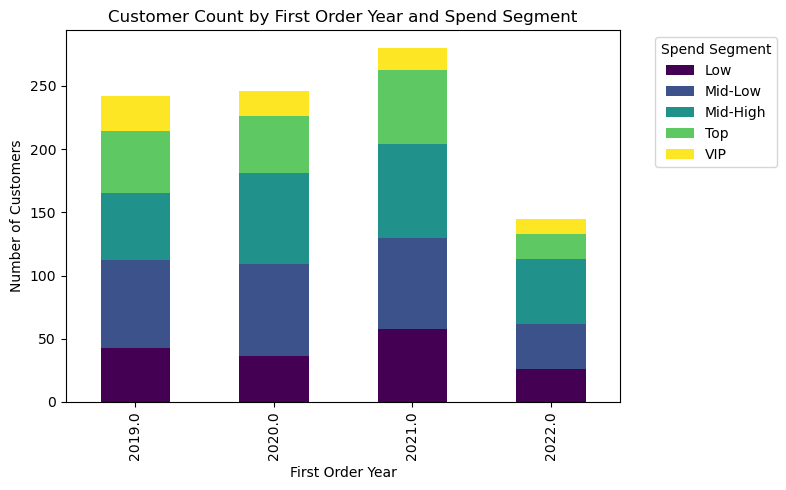

In [90]:
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='viridis'
)

plt.title('Customer Count by First Order Year and Spend Segment')
plt.xlabel('First Order Year')
plt.ylabel('Number of Customers')
plt.legend(title='Spend Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [91]:
customer_view.columns

Index(['Customer ID', 'Customer Name', 'Loyalty Card', 'Country', 'City',
       'Postcode', 'Address Line 1', 'total_orders', 'first_order',
       'last_order', 'total_productst', 'total_quantity', 'total_profit',
       'tot_sales', 'avg_price', 'coffee_types', 'roast_types', 'coffee_size',
       'has_email', 'has_phone', 'activity_days', 'activity_months',
       'activity_weeks', 'first_order_year', 'last_order_year',
       'frequency_rate_days', 'frequency_rate_months', 'frequency', 'recency',
       'lifetime', 'avg_spend_order', 'avg_items_order', 'recency_score',
       'frequency_score', 'spend_quartile', 'spend_segment', 'order_segment'],
      dtype='object')

In [92]:

# Group customers by quartile and spend segment
grouped = (
    customer_view
    .groupby(['spend_quartile', 'spend_segment'])['Customer ID']
    .nunique()
    .reset_index(name='customer_count')
)


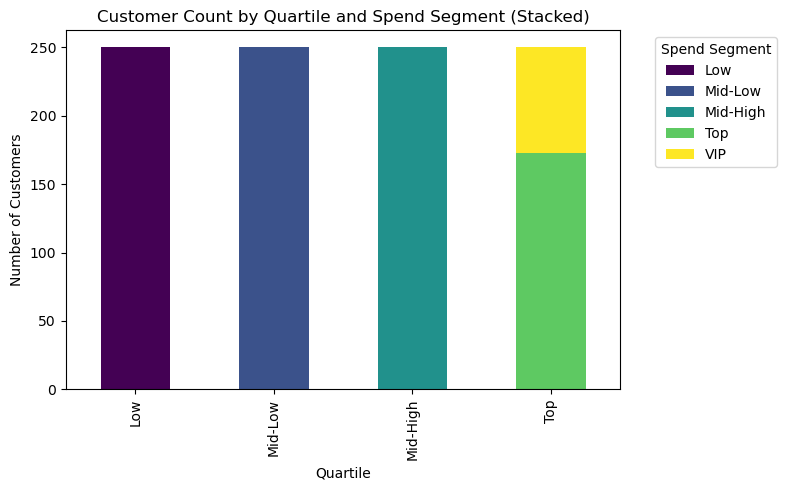

In [93]:
pivot_df = grouped.pivot(index='spend_quartile', columns='spend_segment', values='customer_count').fillna(0)

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    colormap='viridis'
)

plt.title('Customer Count by Quartile and Spend Segment (Stacked)')
plt.xlabel('Quartile')
plt.ylabel('Number of Customers')
plt.legend(title='Spend Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [94]:

# Aggregate: count unique customers by country and spend segment
grouped = (
    customer_view
    .groupby(['Country', 'spend_segment'])['Customer ID']
    .nunique()
    .reset_index(name='customer_count')
)


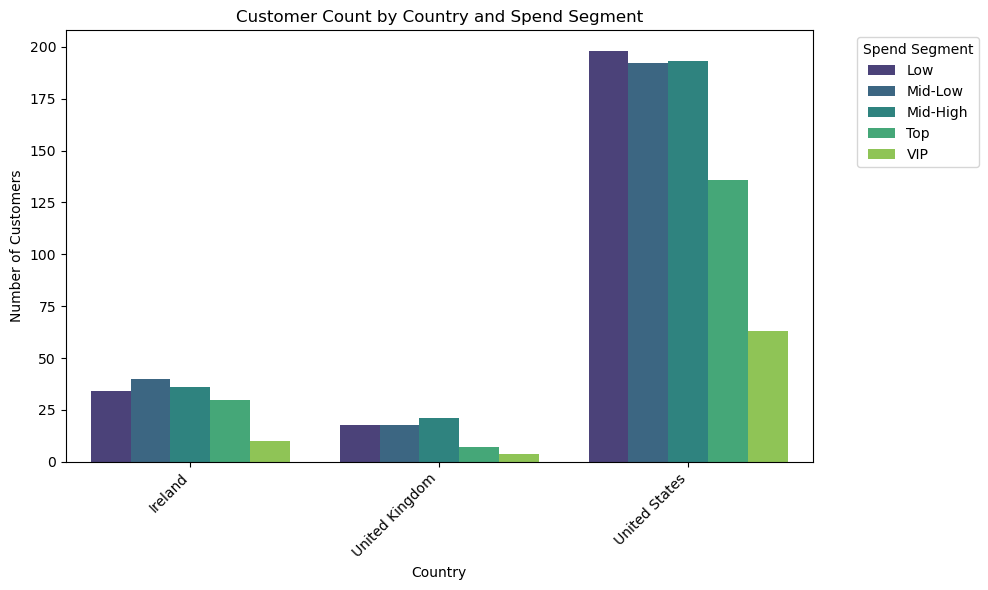

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped,
    x='Country',
    y='customer_count',
    hue='spend_segment',
    palette='viridis'
)

plt.title('Customer Count by Country and Spend Segment')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Spend Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [96]:
merged = merged[merged['Order Date'].dt.month.between(1, 12)]

In [97]:
customer_view['activity_days'].describe()


count     913.000000
mean       15.970427
std       109.050046
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1140.000000
Name: activity_days, dtype: float64

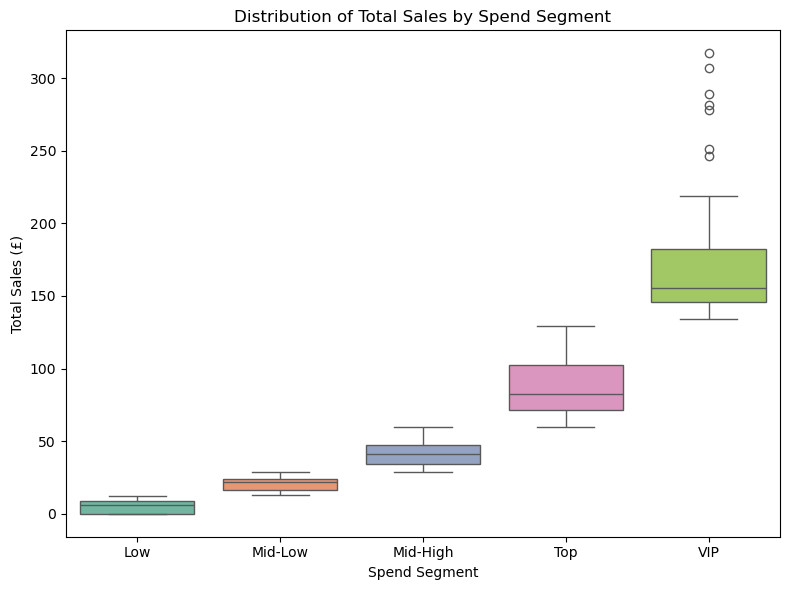

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(
    data=customer_view,
    x='spend_segment',
    y='tot_sales',
    palette='Set2'
)

plt.title('Distribution of Total Sales by Spend Segment')
plt.xlabel('Spend Segment')
plt.ylabel('Total Sales (£)')
plt.tight_layout()
plt.show()


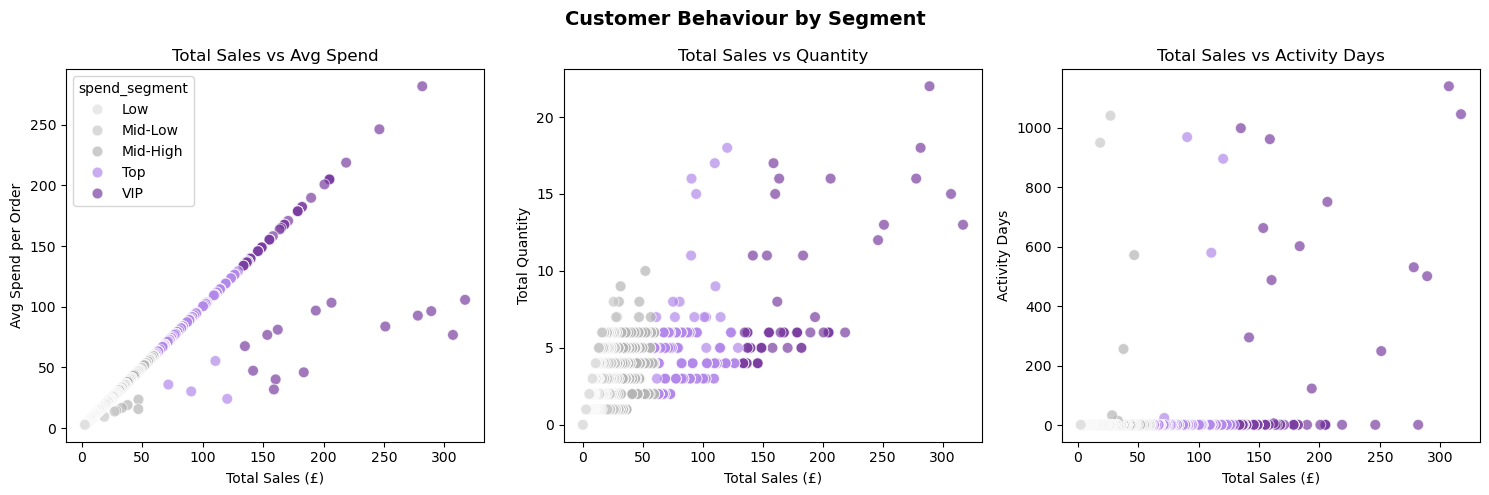

In [99]:

# Define a custom palette: purple for VIP/Top, greys for others
palette = {
    'VIP': '#7B3FA1',       # rich purple
    'Top': '#B388EB',       # soft lavender
    'Mid-High': '#b5b5b5',
    'Mid-Low': '#c9c9c9',
    'Low': '#e0e0e0'
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle('Customer Behaviour by Segment', fontsize=14, fontweight='bold')

# Total Sales vs Average Spend
sns.scatterplot(
    data=customer_view,
    x='tot_sales', y='avg_spend_order',
    hue='spend_segment', palette=palette,
    alpha=0.7, s=60, ax=axes[0]
)
axes[0].set_title('Total Sales vs Avg Spend')
axes[0].set_xlabel('Total Sales (£)')
axes[0].set_ylabel('Avg Spend per Order')

# Total Sales vs Total Quantity
sns.scatterplot(
    data=customer_view,
    x='tot_sales', y='total_quantity',
    hue='spend_segment', palette=palette,
    alpha=0.7, s=60, ax=axes[1], legend=False
)
axes[1].set_title('Total Sales vs Quantity')
axes[1].set_xlabel('Total Sales (£)')
axes[1].set_ylabel('Total Quantity')

# 3️Total Sales vs Activity Days
sns.scatterplot(
    data=customer_view,
    x='tot_sales', y='activity_days',
    hue='spend_segment', palette=palette,
    alpha=0.7, s=60, ax=axes[2], legend=False
)
axes[2].set_title('Total Sales vs Activity Days')
axes[2].set_xlabel('Total Sales (£)')
axes[2].set_ylabel('Activity Days')

plt.tight_layout()
for ax in axes:
    ax.grid(False)

plt.show()


In [100]:
customer_view.columns

Index(['Customer ID', 'Customer Name', 'Loyalty Card', 'Country', 'City',
       'Postcode', 'Address Line 1', 'total_orders', 'first_order',
       'last_order', 'total_productst', 'total_quantity', 'total_profit',
       'tot_sales', 'avg_price', 'coffee_types', 'roast_types', 'coffee_size',
       'has_email', 'has_phone', 'activity_days', 'activity_months',
       'activity_weeks', 'first_order_year', 'last_order_year',
       'frequency_rate_days', 'frequency_rate_months', 'frequency', 'recency',
       'lifetime', 'avg_spend_order', 'avg_items_order', 'recency_score',
       'frequency_score', 'spend_quartile', 'spend_segment', 'order_segment'],
      dtype='object')

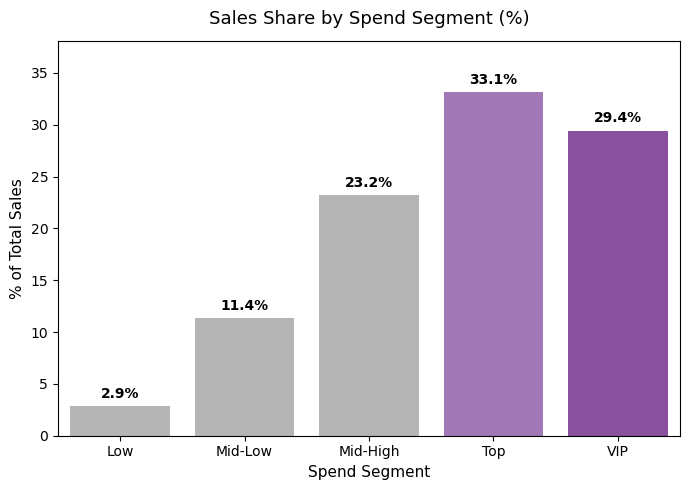

In [116]:


# Fixed order + colors
seg_order  = ['Low', 'Mid-Low', 'Mid-High', 'Top', 'VIP']
seg_colors = ['#b5b5b5', '#b5b5b5', '#b5b5b5', '#a56cc1', '#8e44ad']  # lighter purple

# Aggregate total sales and percent share
seg_sales = (
    customer_view
    .groupby('spend_segment')['tot_sales']
    .sum()
    .reindex(seg_order)
    .reset_index(name='total_sales')
)
seg_sales['pct'] = seg_sales['total_sales'] / seg_sales['total_sales'].sum() * 100

# Plot
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=seg_sales,
    x='spend_segment',
    y='pct',
    order=seg_order,
    palette=seg_colors
)

ax.set_title('Sales Share by Spend Segment (%)', pad=12, fontsize=13)
ax.set_xlabel('Spend Segment', fontsize=11)
ax.set_ylabel('% of Total Sales', fontsize=11)
ax.set_ylim(0, seg_sales['pct'].max() * 1.15)  # proportional headroom

# Add labels on top
for p, v in zip(ax.patches, seg_sales['pct']):
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + (seg_sales['pct'].max() * 0.015),
        f'{v:.1f}%',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.grid(False)
plt.show()


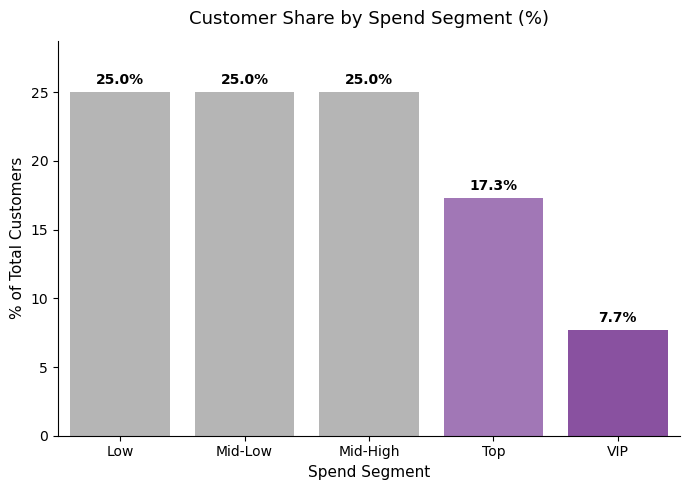

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed order + colors
seg_order  = ['Low', 'Mid-Low', 'Mid-High', 'Top', 'VIP']
seg_colors = ['#b5b5b5', '#b5b5b5', '#b5b5b5', '#a56cc1', '#8e44ad']  # greys → purple

# --- Aggregate customer counts ---
seg_customers = (
    customer_view
    .groupby('spend_segment')['Customer ID']
    .nunique()
    .reindex(seg_order)
    .reset_index(name='customers')
)

# Calculate percentage of total customers
seg_customers['pct'] = seg_customers['customers'] / seg_customers['customers'].sum() * 100

# --- Plot ---
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=seg_customers,
    x='spend_segment',
    y='pct',
    order=seg_order,
    palette=seg_colors
)

# Titles & labels
ax.set_title('Customer Share by Spend Segment (%)', pad=12, fontsize=13)
ax.set_xlabel('Spend Segment', fontsize=11)
ax.set_ylabel('% of Total Customers', fontsize=11)
ax.set_ylim(0, seg_customers['pct'].max() * 1.15)

# Add percentage labels
for p, v in zip(ax.patches, seg_customers['pct']):
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + (seg_customers['pct'].max() * 0.015),
        f'{v:.1f}%',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.grid(False)
sns.despine()
plt.show()


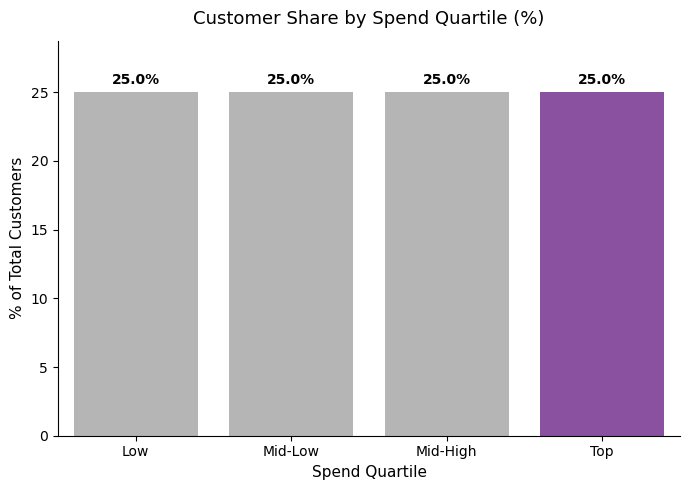

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed order + colors for quartiles
quart_order  = ['Low', 'Mid-Low', 'Mid-High', 'Top']
quart_colors = ['#b5b5b5', '#b5b5b5', '#b5b5b5', '#8e44ad']  # purple for Top

# Aggregate unique customers by quartile
quart_customers = (
    customer_view
    .groupby('spend_quartile')['Customer ID']
    .nunique()
    .reindex(quart_order)
    .reset_index(name='customers')
)

# % of total customers
quart_customers['pct'] = quart_customers['customers'] / quart_customers['customers'].sum() * 100

# Plot
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=quart_customers,
    x='spend_quartile', y='pct',
    order=quart_order, palette=quart_colors
)

ax.set_title('Customer Share by Spend Quartile (%)', pad=12, fontsize=13)
ax.set_xlabel('Spend Quartile', fontsize=11)
ax.set_ylabel('% of Total Customers', fontsize=11)
ax.set_ylim(0, quart_customers['pct'].max() * 1.15)

# Labels on top
for p, v in zip(ax.patches, quart_customers['pct']):
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + (quart_customers['pct'].max() * 0.015),
        f'{v:.1f}%',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.grid(False)
sns.despine()
plt.show()


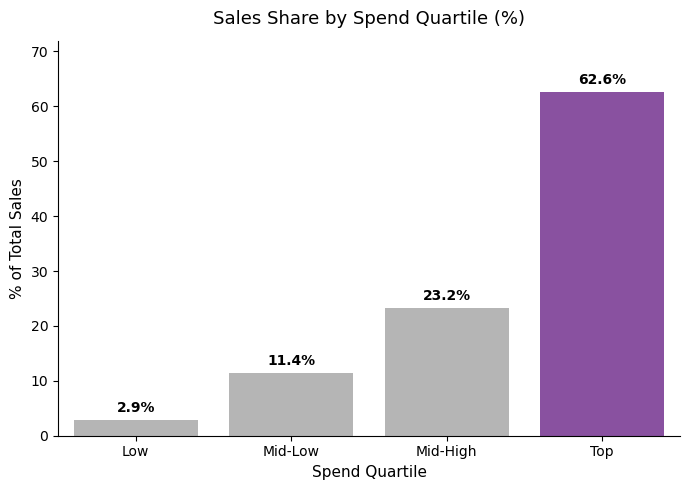

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fixed order + colors for quartiles
quart_order  = ['Low', 'Mid-Low', 'Mid-High', 'Top']
quart_colors = ['#b5b5b5', '#b5b5b5', '#b5b5b5', '#8e44ad']  # purple for Top

# Aggregate total sales by quartile
quart_sales = (
    customer_view
    .groupby('spend_quartile')['tot_sales']
    .sum()
    .reindex(quart_order)
    .reset_index(name='total_sales')
)

# % of total sales
quart_sales['pct'] = quart_sales['total_sales'] / quart_sales['total_sales'].sum() * 100

# Plot
plt.figure(figsize=(7,5))
ax = sns.barplot(
    data=quart_sales,
    x='spend_quartile', y='pct',
    order=quart_order, palette=quart_colors
)

ax.set_title('Sales Share by Spend Quartile (%)', pad=12, fontsize=13)
ax.set_xlabel('Spend Quartile', fontsize=11)
ax.set_ylabel('% of Total Sales', fontsize=11)
ax.set_ylim(0, quart_sales['pct'].max() * 1.15)

# Add percentage labels on top
for p, v in zip(ax.patches, quart_sales['pct']):
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + (quart_sales['pct'].max() * 0.015),
        f'{v:.1f}%',
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.tight_layout()
plt.grid(False)
sns.despine()
plt.show()


In [120]:
customer_view.columns

Index(['Customer ID', 'Customer Name', 'Loyalty Card', 'Country', 'City',
       'Postcode', 'Address Line 1', 'total_orders', 'first_order',
       'last_order', 'total_productst', 'total_quantity', 'total_profit',
       'tot_sales', 'avg_price', 'coffee_types', 'roast_types', 'coffee_size',
       'has_email', 'has_phone', 'activity_days', 'activity_months',
       'activity_weeks', 'first_order_year', 'last_order_year',
       'frequency_rate_days', 'frequency_rate_months', 'frequency', 'recency',
       'lifetime', 'avg_spend_order', 'avg_items_order', 'recency_score',
       'frequency_score', 'spend_quartile', 'spend_segment', 'order_segment'],
      dtype='object')